## **LoanTap**



#### **Introduction**
Loantap is a leading financial technology company based in India, specializing in providing flexible and innovative loan products to individuals and businesses. With a focus on customer-centric solutions, Loantap leverages technology to offer hassle-free borrowing experiences, including personal loans, salary advances, and flexible EMI options. Their commitment to transparency, speed, and convenience has established them as a trusted partner for borrowers seeking efficient financial solutions.

- LoanTap is at the forefront of offering tailored financial solutions to millennials.

- Their innovative approach seeks to harness data science for refining their credit underwriting process.

- The focus here is the Personal Loan segment. A deep dive into the dataset can reveal patterns in borrower behavior and creditworthiness.

- Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.

- The insights gained can optimize loan disbursal, balancing customer outreach with risk management.

#### **Problem Statement**
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, TargetEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score,roc_curve, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay,f1_score,recall_score,precision_score
)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import chi2_contingency


Dataset link: https://drive.google.com/file/d/1Eky6bPeveLFia9LFo1iXv_SBf21HXW5P/view?usp=sharing

In [3]:
df=pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df1=df.copy()

#### **Dataset Features**
- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- grade : LoanTap assigned loan grade
- sub_grade : LoanTap assigned loan subgrade
- emp_title :The job title supplied by the Borrower when applying for the loan.*
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- annual_inc : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- issue_d : The month which the loan was funded
- loan_status : Current status of the loan - Target Variable
- purpose : A category provided by the borrower for the loan request.
- title : The loan title provided by the borrower
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line :The month the borrower's earliest reported credit line was opened
- open_acc : The number of open credit lines in the borrower's credit file.
- pub_rec : Number of derogatory public records
- revol_bal : Total credit revolving balance
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc : The total number of credit lines currently in the borrower's credit file
- initial_list_status : The initial listing status of the loan. Possible values are – W, F
- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc : Number of mortgage accounts.
- pub_rec_bankruptcies : Number of public record bankruptcies
- Address: Address of the individual

#### **Exploration of Data**

In [5]:
# Analyze the dataset structure
data_info = df.info()
data_shape = df.shape
data_description = df.describe(include='all')
missing_values = df.isnull().sum()

# Separating numeric and categorical attributes
numeric_attributes = df.select_dtypes(include=['number']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Output the results
data_info, data_shape, data_description, missing_values, numeric_attributes, categorical_attributes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

(None,
 (396030, 27),
             loan_amnt        term       int_rate    installment   grade  \
 count   396030.000000      396030  396030.000000  396030.000000  396030   
 unique            NaN           2            NaN            NaN       7   
 top               NaN   36 months            NaN            NaN       B   
 freq              NaN      302005            NaN            NaN  116018   
 mean     14113.888089         NaN      13.639400     431.849698     NaN   
 std       8357.441341         NaN       4.472157     250.727790     NaN   
 min        500.000000         NaN       5.320000      16.080000     NaN   
 25%       8000.000000         NaN      10.490000     250.330000     NaN   
 50%      12000.000000         NaN      13.330000     375.430000     NaN   
 75%      20000.000000         NaN      16.490000     567.300000     NaN   
 max      40000.000000         NaN      30.990000    1533.810000     NaN   
 
        sub_grade emp_title emp_length home_ownership    annual_

In [6]:
# Convert categorical columns to 'category' data type
for col in categorical_attributes:
    df[col] = df[col].astype('category')

# Verify the data types after conversion
updated_data_info = df.info()
updated_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  category
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394274 non-nul

In [7]:
#checking the unique values for columns
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {df[_].unique()}')
    print(f'Value_counts of {_} column :-\n {df[_].value_counts()}')
    print()
    print('-'*120)


Total Unique Values in loan_amnt column are :- 1397
Unique Values in loan_amnt column are :-
 [10000.  8000. 15600. ... 36275. 36475.   725.]
Value_counts of loan_amnt column :-
 loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: count, Length: 1397, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in term column are :- 2
Unique Values in term column are :-
 [' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']
Value_counts of term column :-
 term
36 months    302005
60 months     94025
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in int_rate column are :- 566
Unique Values in int_

#### **Univariate Analysis**

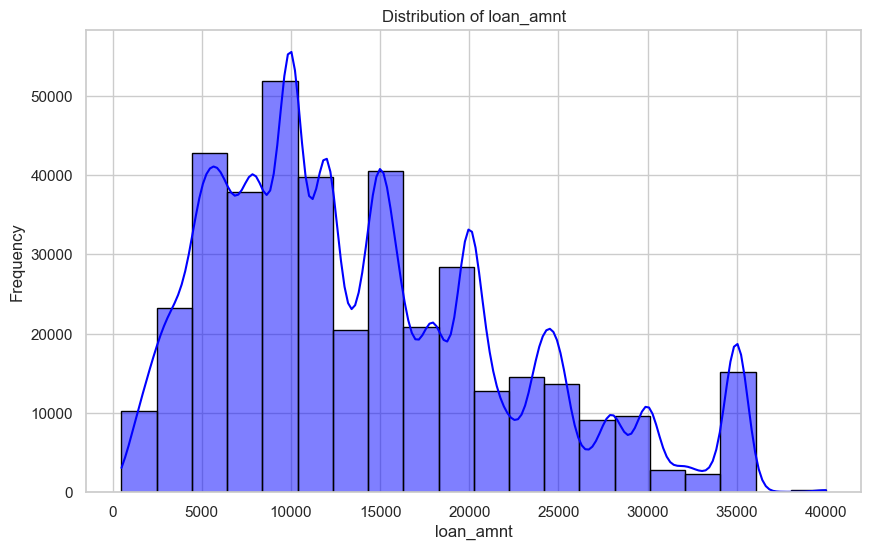

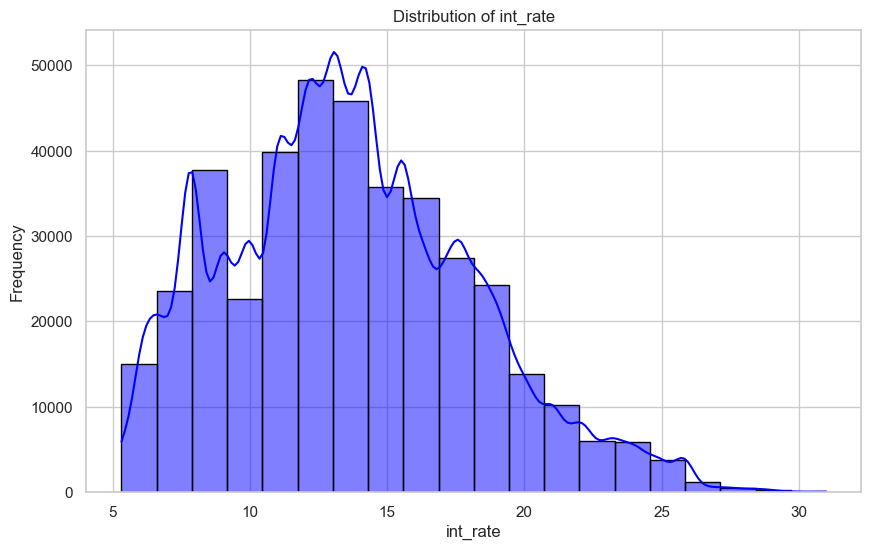

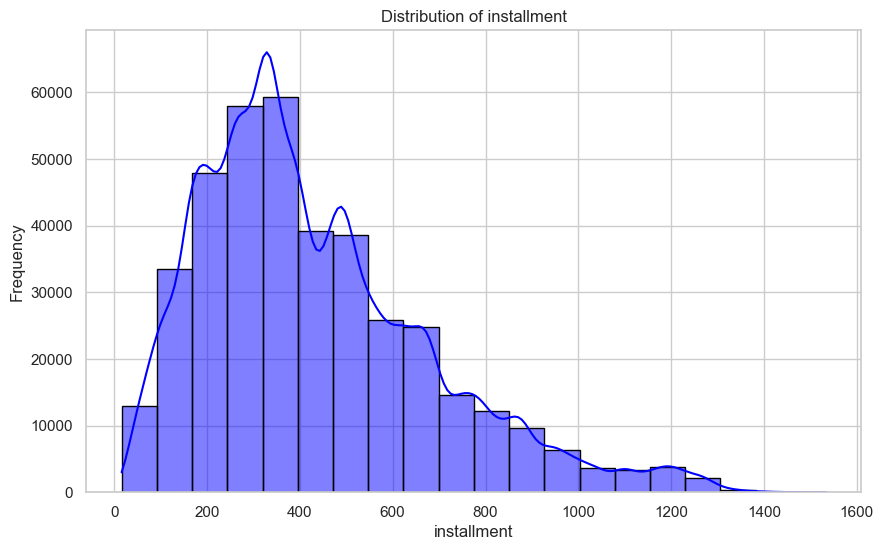

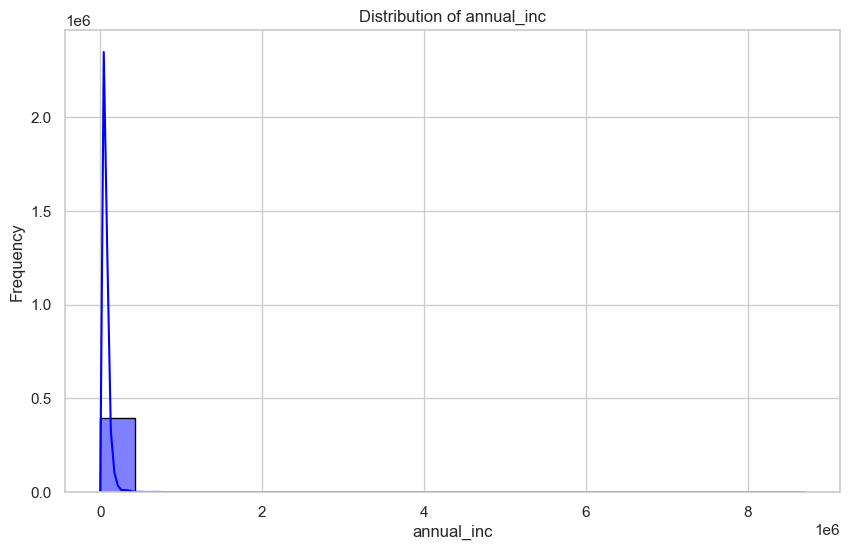

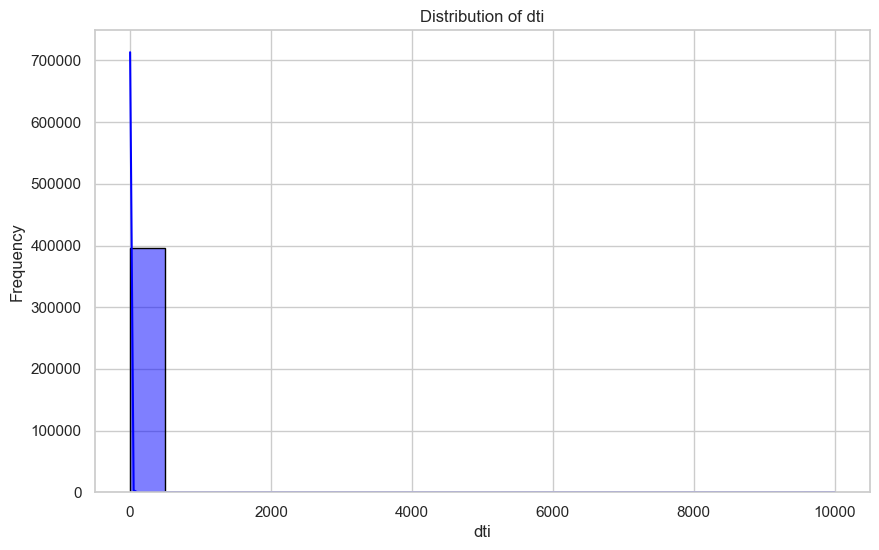

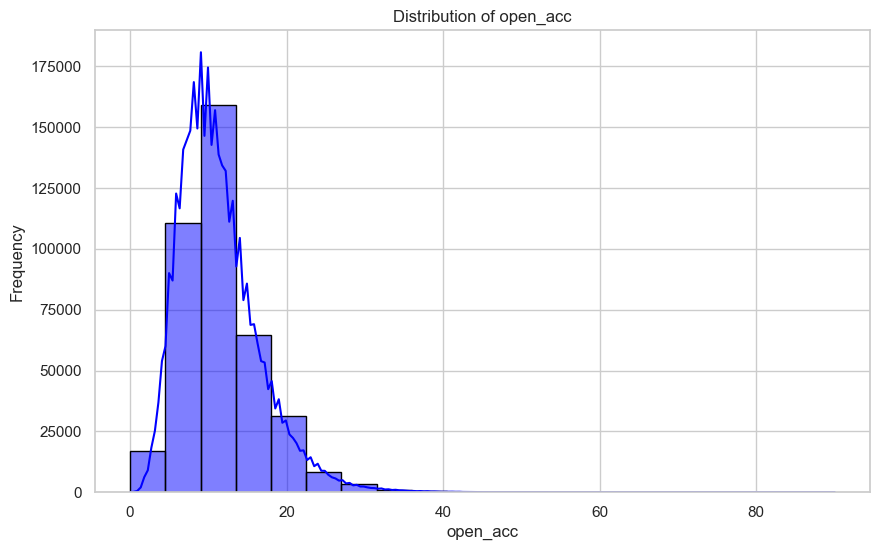

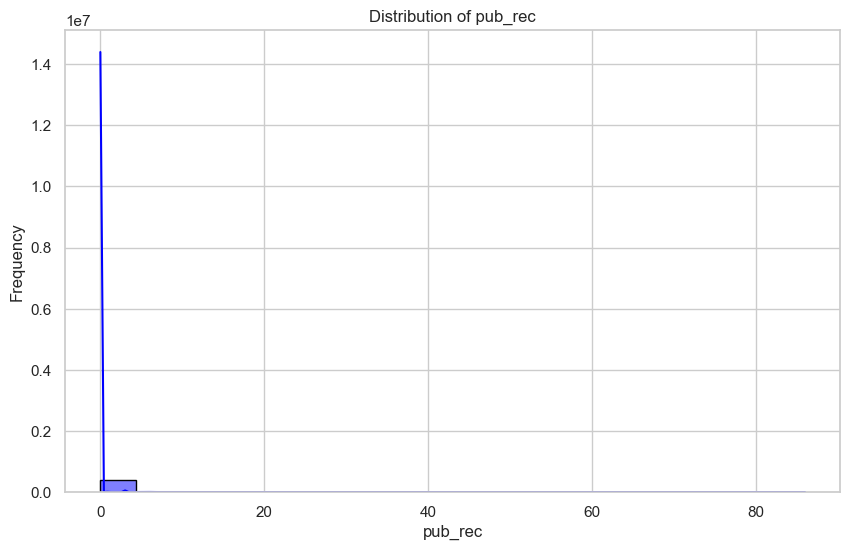

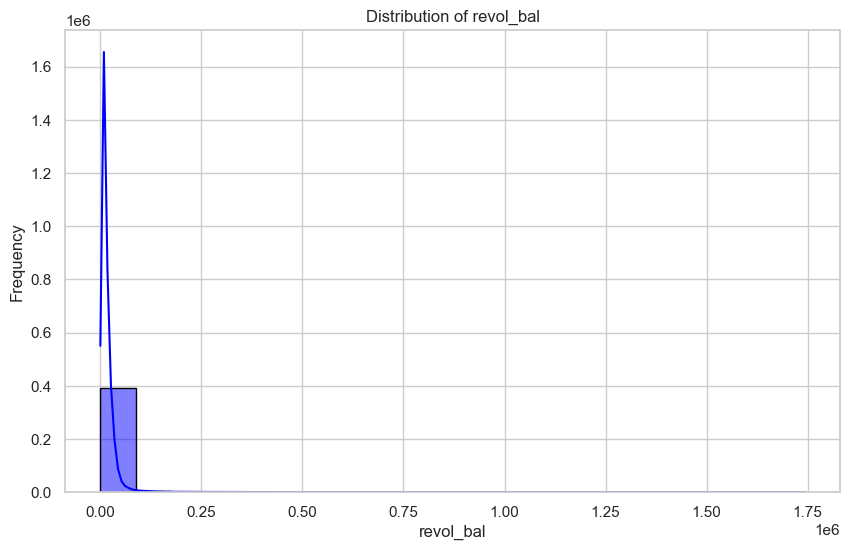

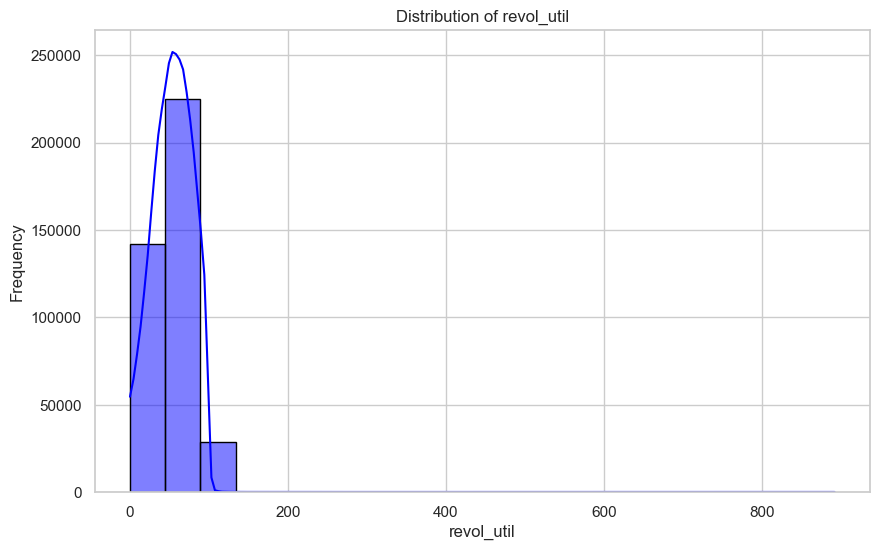

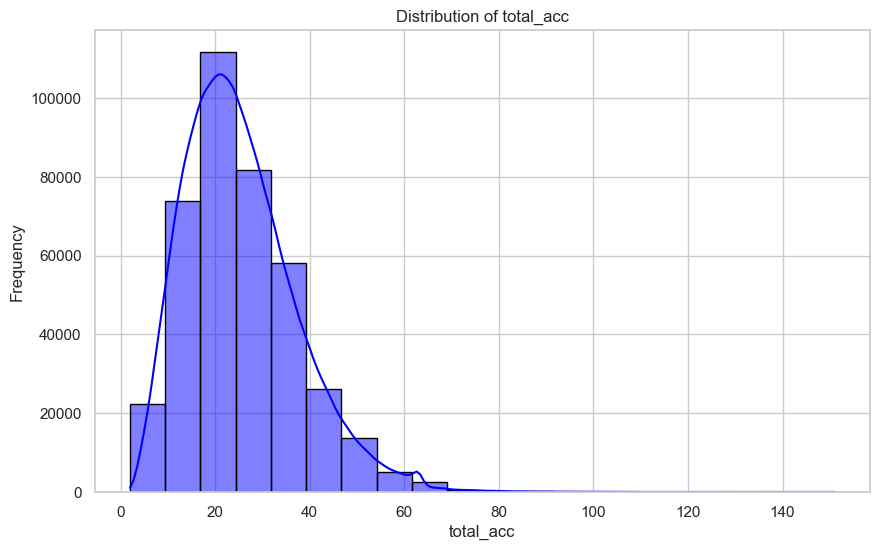

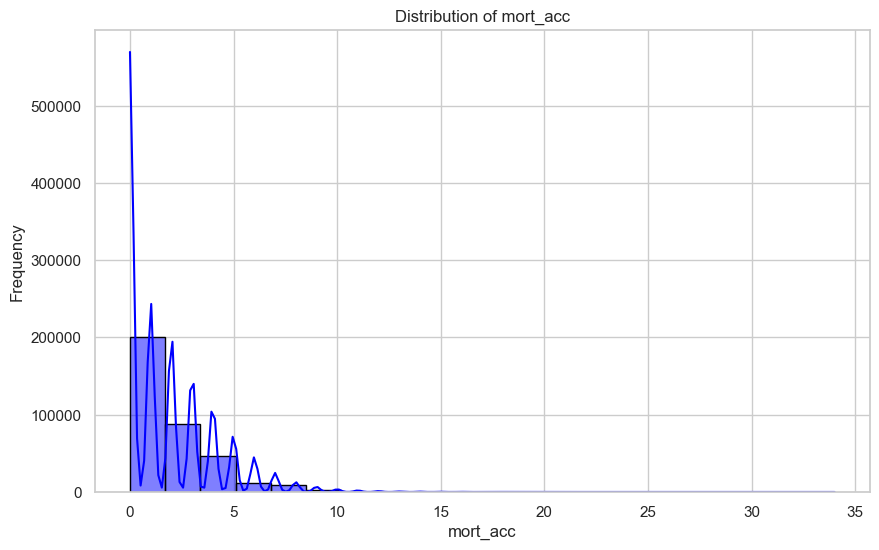

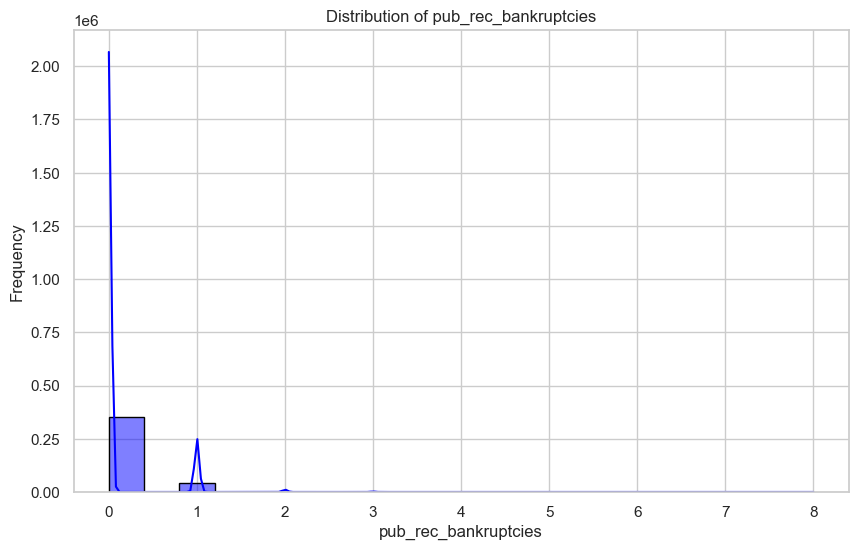

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


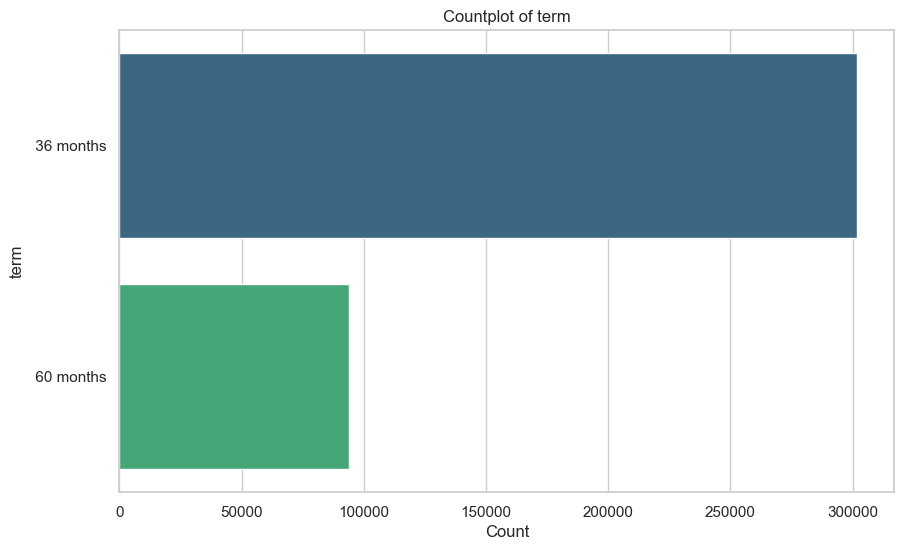

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


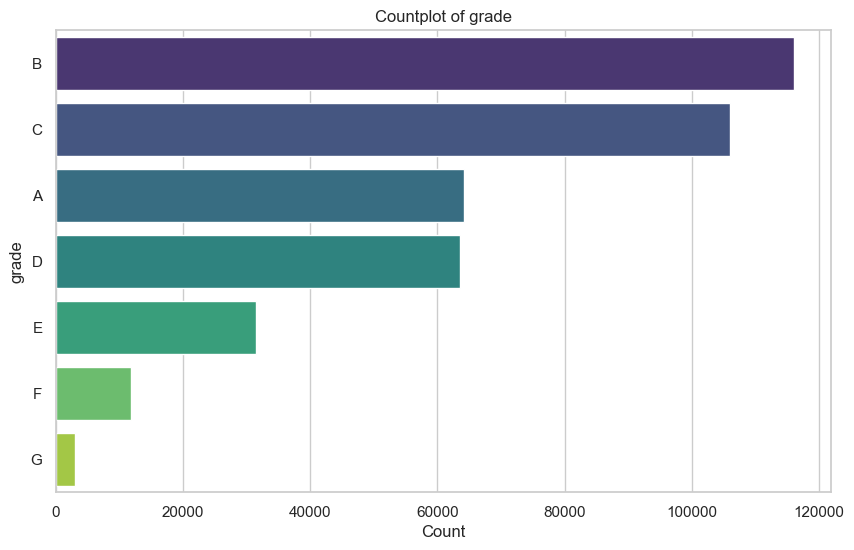

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


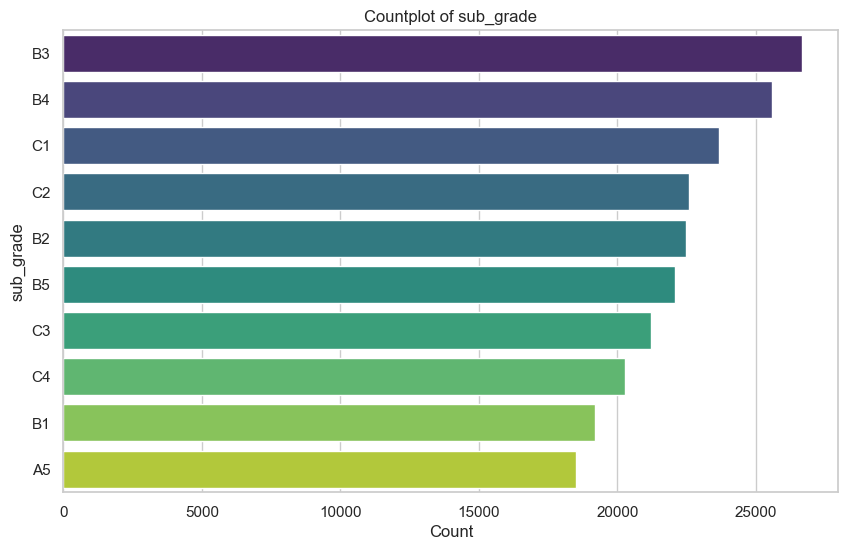

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


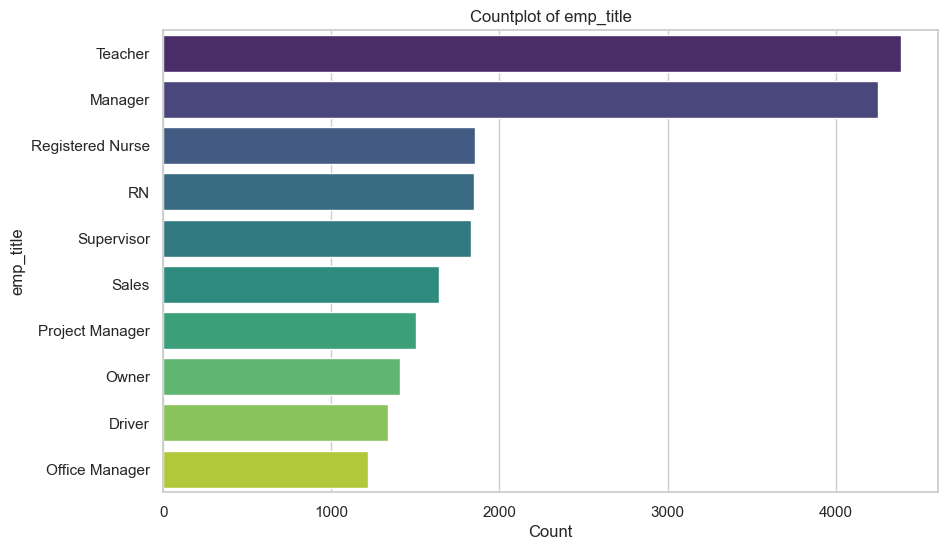

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


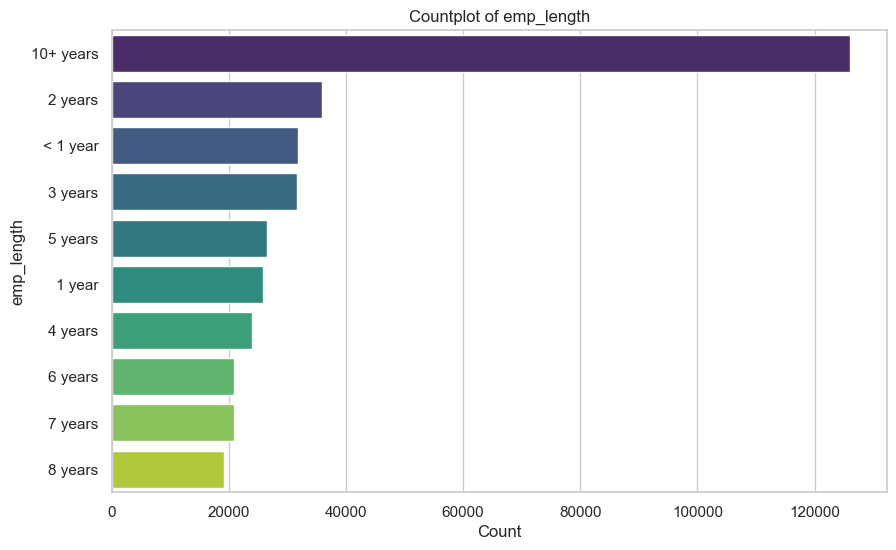

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


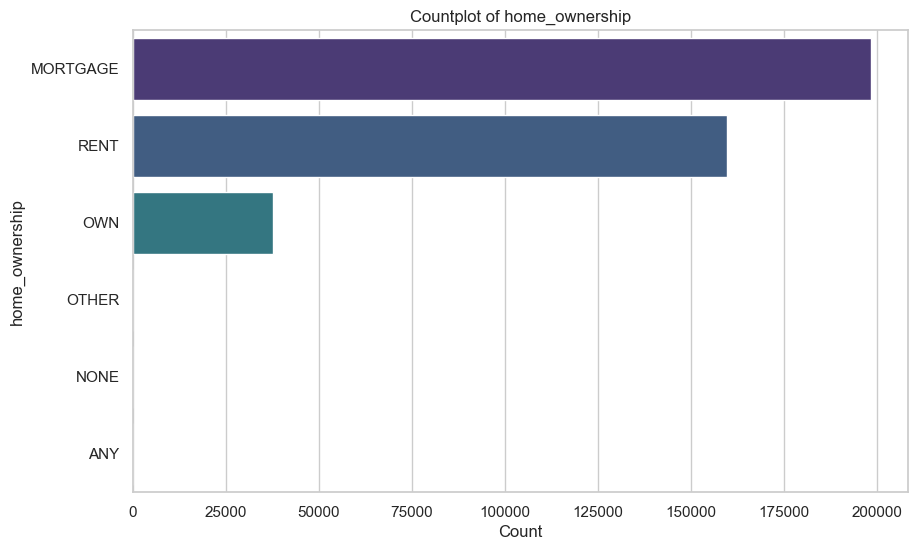

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


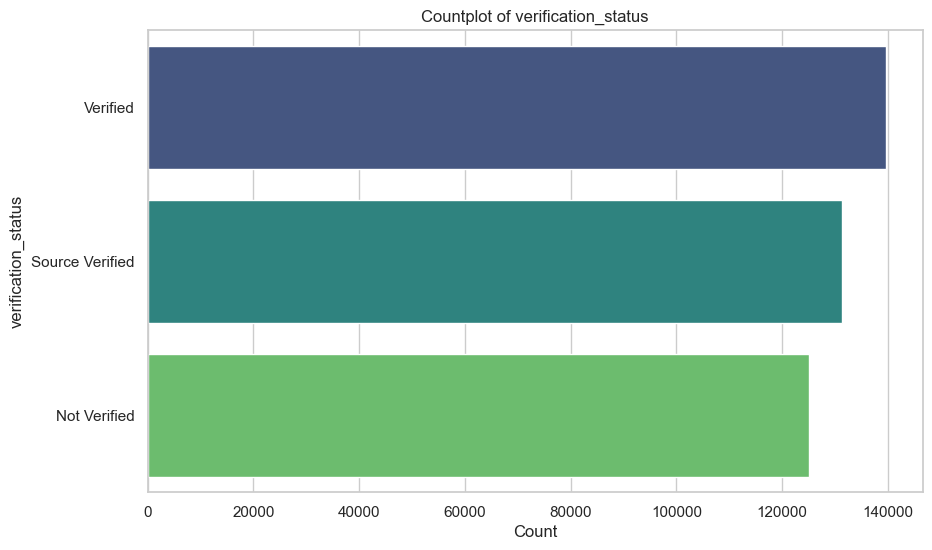

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


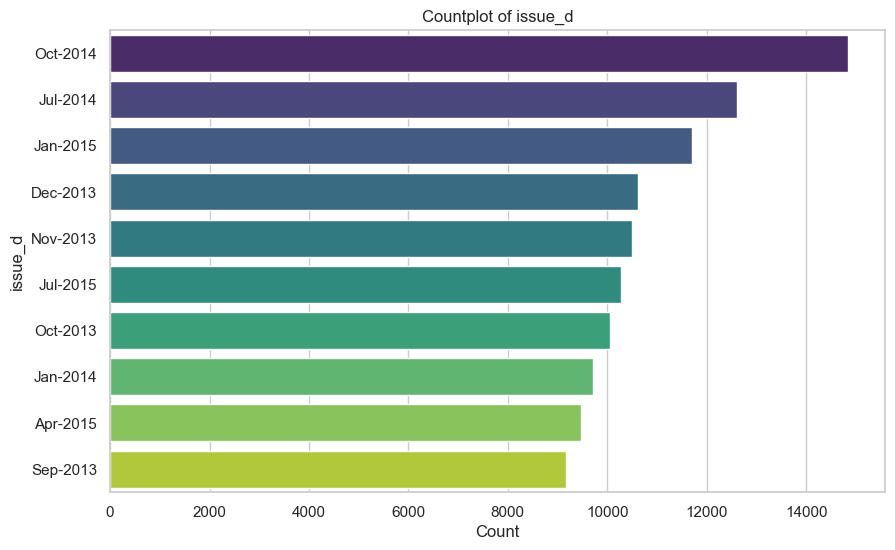

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


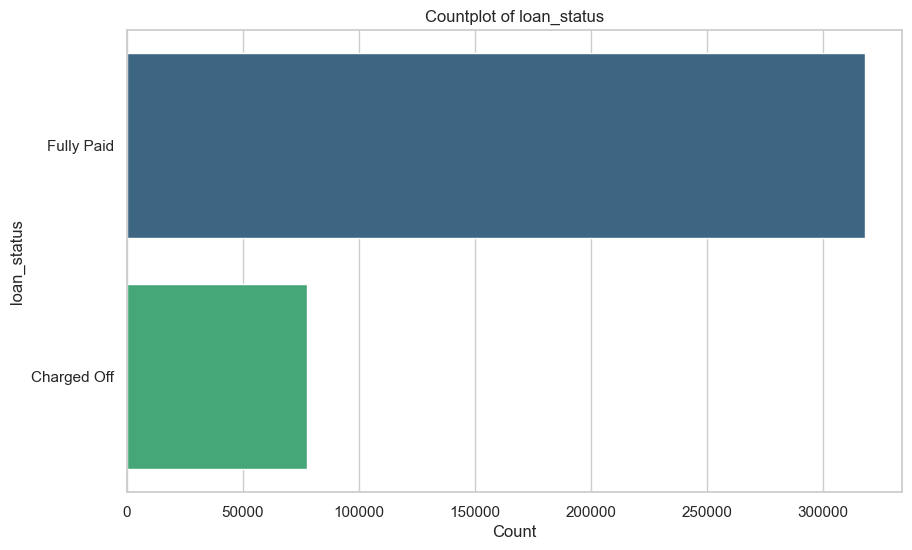

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


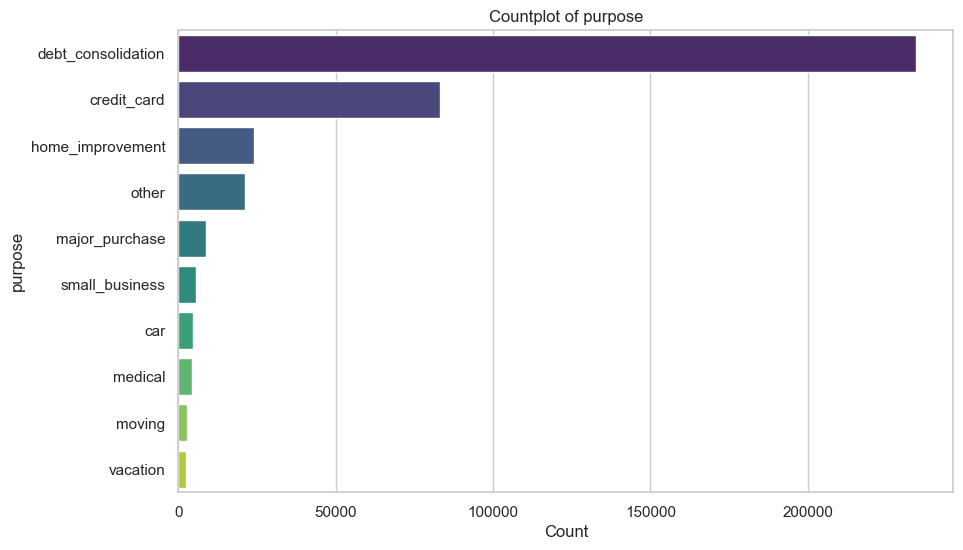

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


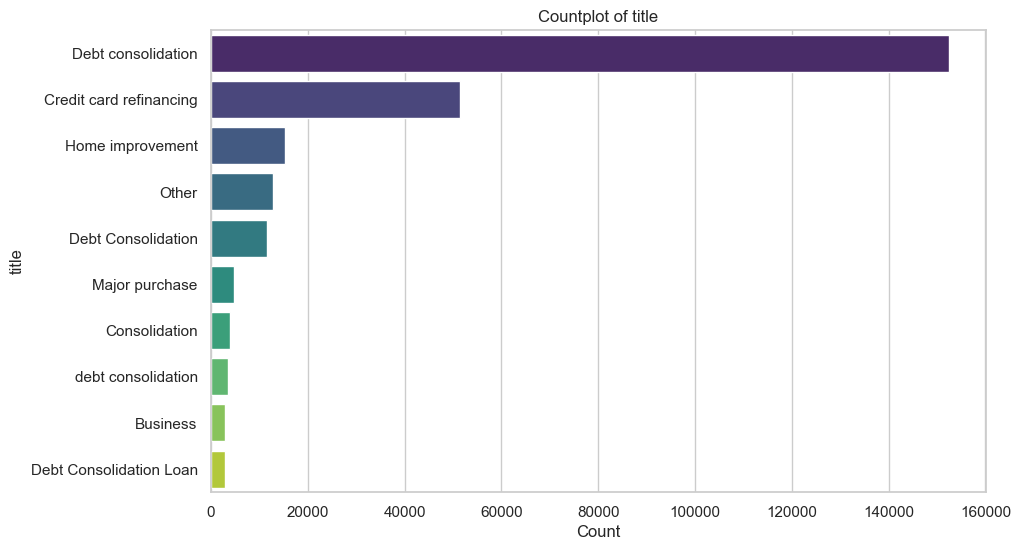

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


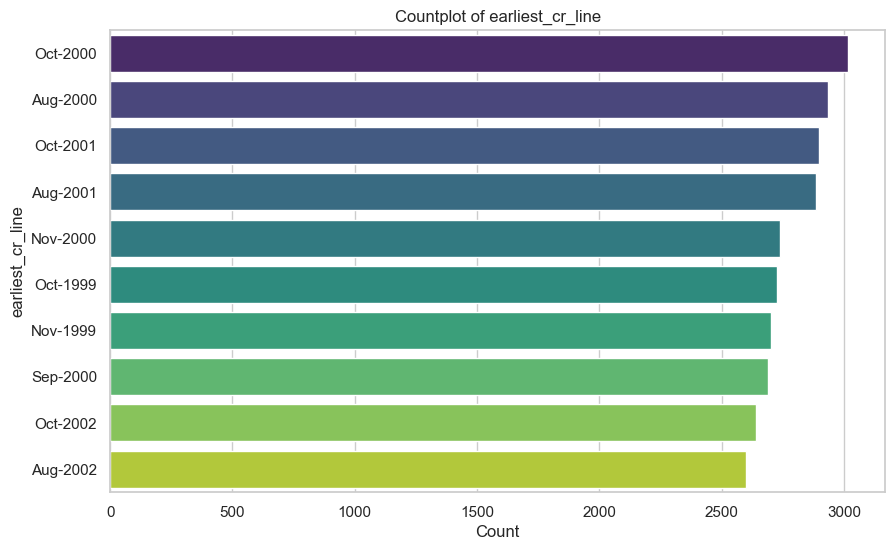

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


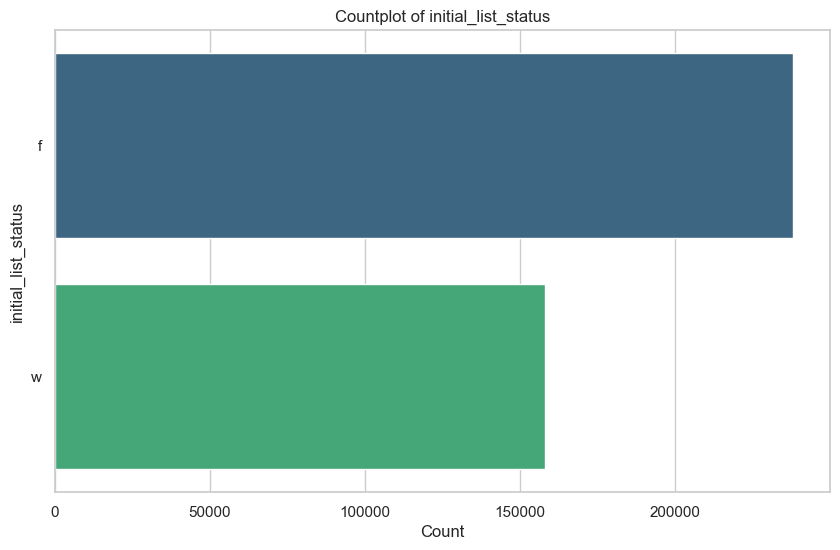

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories


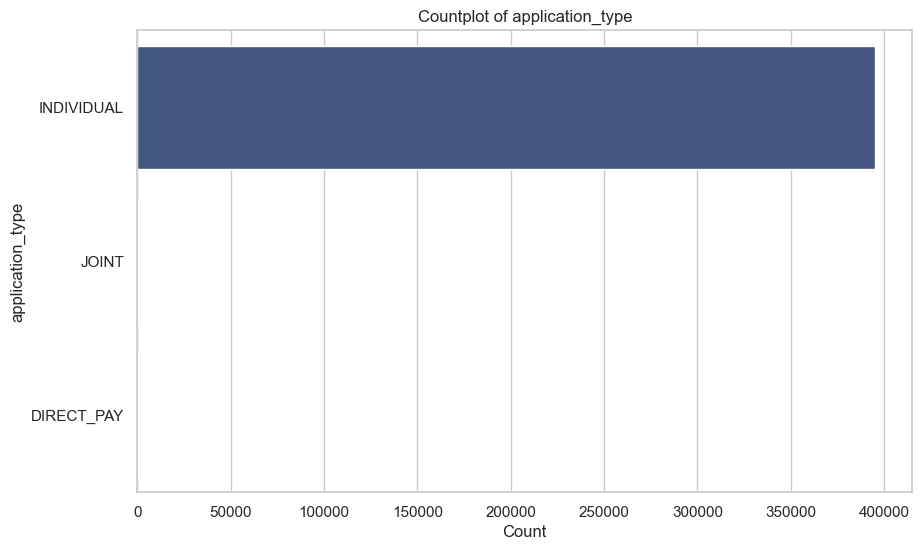

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\379287703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories
) missing from font(s) Arial.g\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


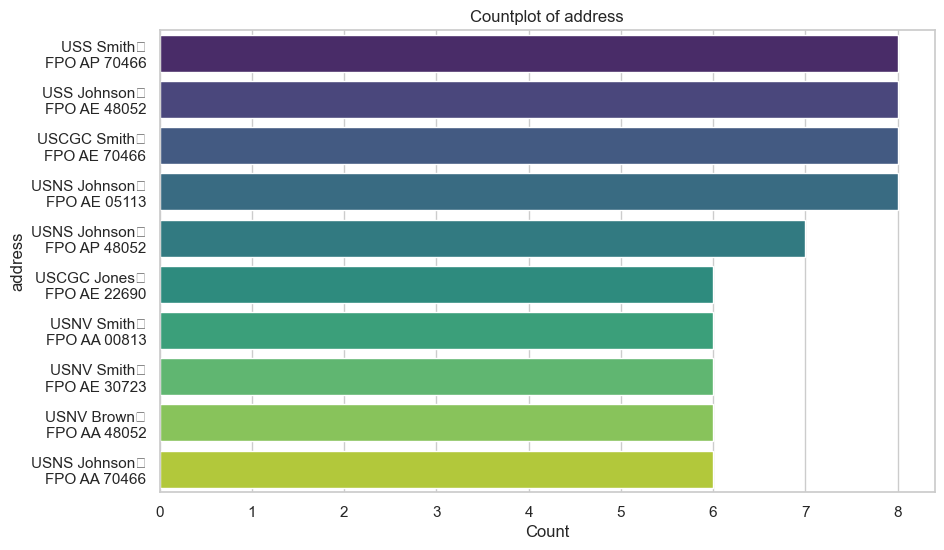

In [8]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Univariate Analysis for Numeric Attributes (Histograms)
for col in numeric_attributes[:]:  # Displaying first 5 numeric attributes for efficiency
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Univariate Analysis for Categorical Attributes (Count Plots)
for col in categorical_attributes[:]:  # Displaying first 5 categorical attributes for efficiency
    plt.figure()
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette="viridis")  # Top 10 categories
    plt.title(f"Countplot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

##### **Continuous Variables**
- `loan_amnt`: The distribution is positively skewed, with most loans around $8,000–$20,000.
- `int_rate`: Interest rates are centered around 10–15%, with some higher outliers.
- `installment`: Most installments are below $500, indicating smaller loan payments.
- `annual_inc`: Highly skewed, with most incomes below $100,000 and a few extreme outliers.
- `dti`: Debt-to-income ratios are concentrated below 50%, with a few higher values.
- `revol_bal`: Majority of balances are under $25,000, with significant outliers reaching higher values.
- `revol_util`: Utilization rates are generally below 100%, with most borrowers between 30–70%.
- `total_acc`: Most borrowers have 10–30 accounts, indicating moderate credit activity.
##### **Categorical Variables**
- `term`: Majority of loans are for 36 months compared to 60 months.
- grade: Grades are distributed across A to G, with B being the most common.
- `sub_grade`: Sub-grades show a finer distribution within grades, with B3, B5, and C1 being frequent.
- `emp_length`: Most borrowers have 10+ years of experience or less than 1 year.
- `home_ownership`: Majority have mortgages, followed by rent, and fewer own homes outright.
- `verification_status`: Verified incomes are slightly more common than unverified ones.
- `loan_status`: Majority loans are marked as "Fully Paid" or "Charged Off."
- purpose: Common purposes include debt consolidation and credit card refinancing.
- `title`: Similar to purpose with debt consolidation dominating.
- `application_type`: Most loans are individual applications with fewer joint applications.
- `initial_list_status`: Status "f" is slightly more frequent than "w."

#### **Bivariate Analysis**

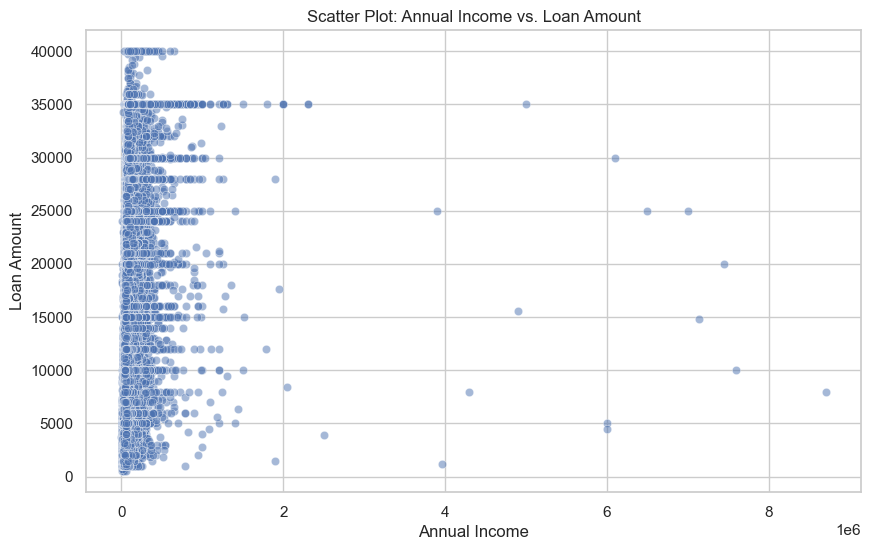

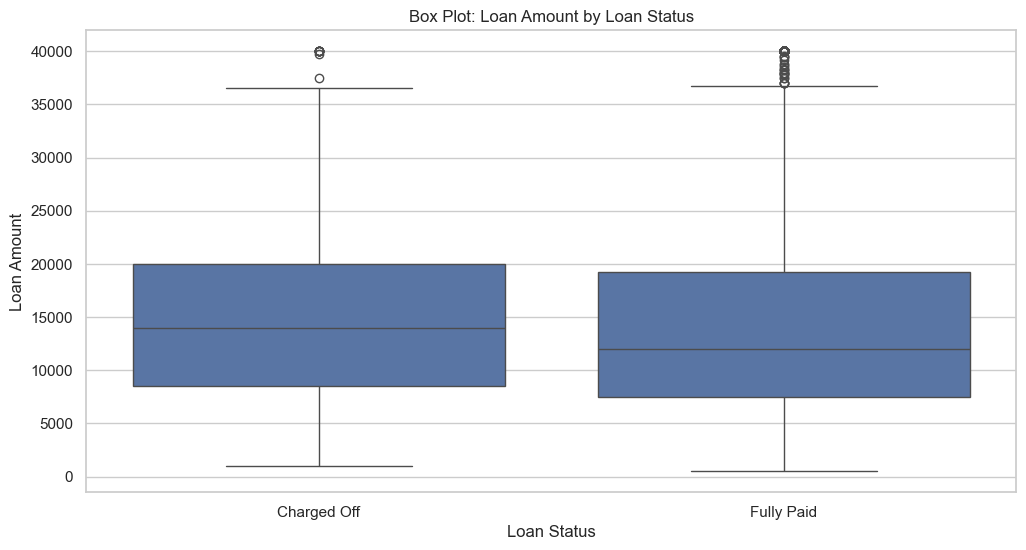

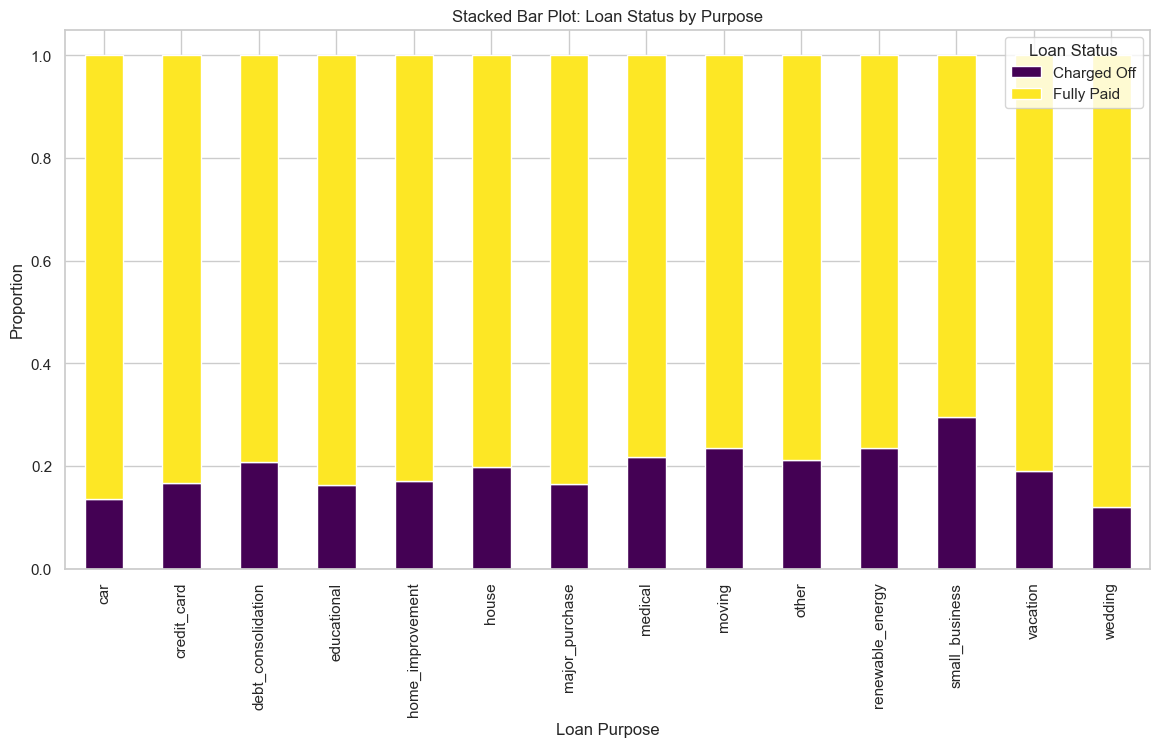

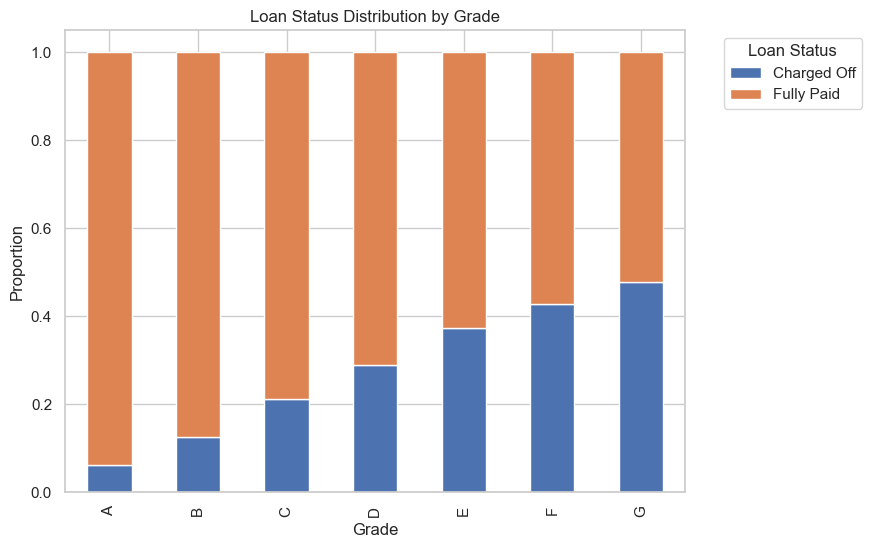

In [9]:
# Example 1: Scatter plot - Continuous vs. Continuous
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', alpha=0.5, data=df)
plt.title('Scatter Plot: Annual Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Example 2: Boxplot - Categorical vs. Continuous
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Box Plot: Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

# Example 3: Stacked Bar Plot - Categorical vs. Categorical
loan_status_purpose = pd.crosstab(df['purpose'], df['loan_status'], normalize='index')
loan_status_purpose.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Stacked Bar Plot: Loan Status by Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')
plt.show()

#Stacked bar plot: grade vs. loan_status (Categorical vs. Categorical)
crosstab = pd.crosstab(df['grade'], df['loan_status'], normalize='index')
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Scatter Plot: Annual Income vs. Loan Amount
    - Income plays a significant role in determining loan eligibility or borrowing capacity.
- Box Plot: Loan Amount by Loan Status
    - Loan approval likelihood increases with higher loan amounts, but other factors may influence variability in loan status.
- Stacked Bar Plot: Loan Status by Purpose
    - Loan purpose significantly impacts approval likelihood, possibly due to risk assessment tied to specific purposes.
- Stacked Bar Plot: Loan Status Distribution by Grade

    - Higher grades (e.g., A, B) show a higher proportion of approved loans.
    - Lower grades (e.g., E, F, G) have a significant proportion of non-approved loans, indicating a strong relationship between grade and loan approval likelihood.

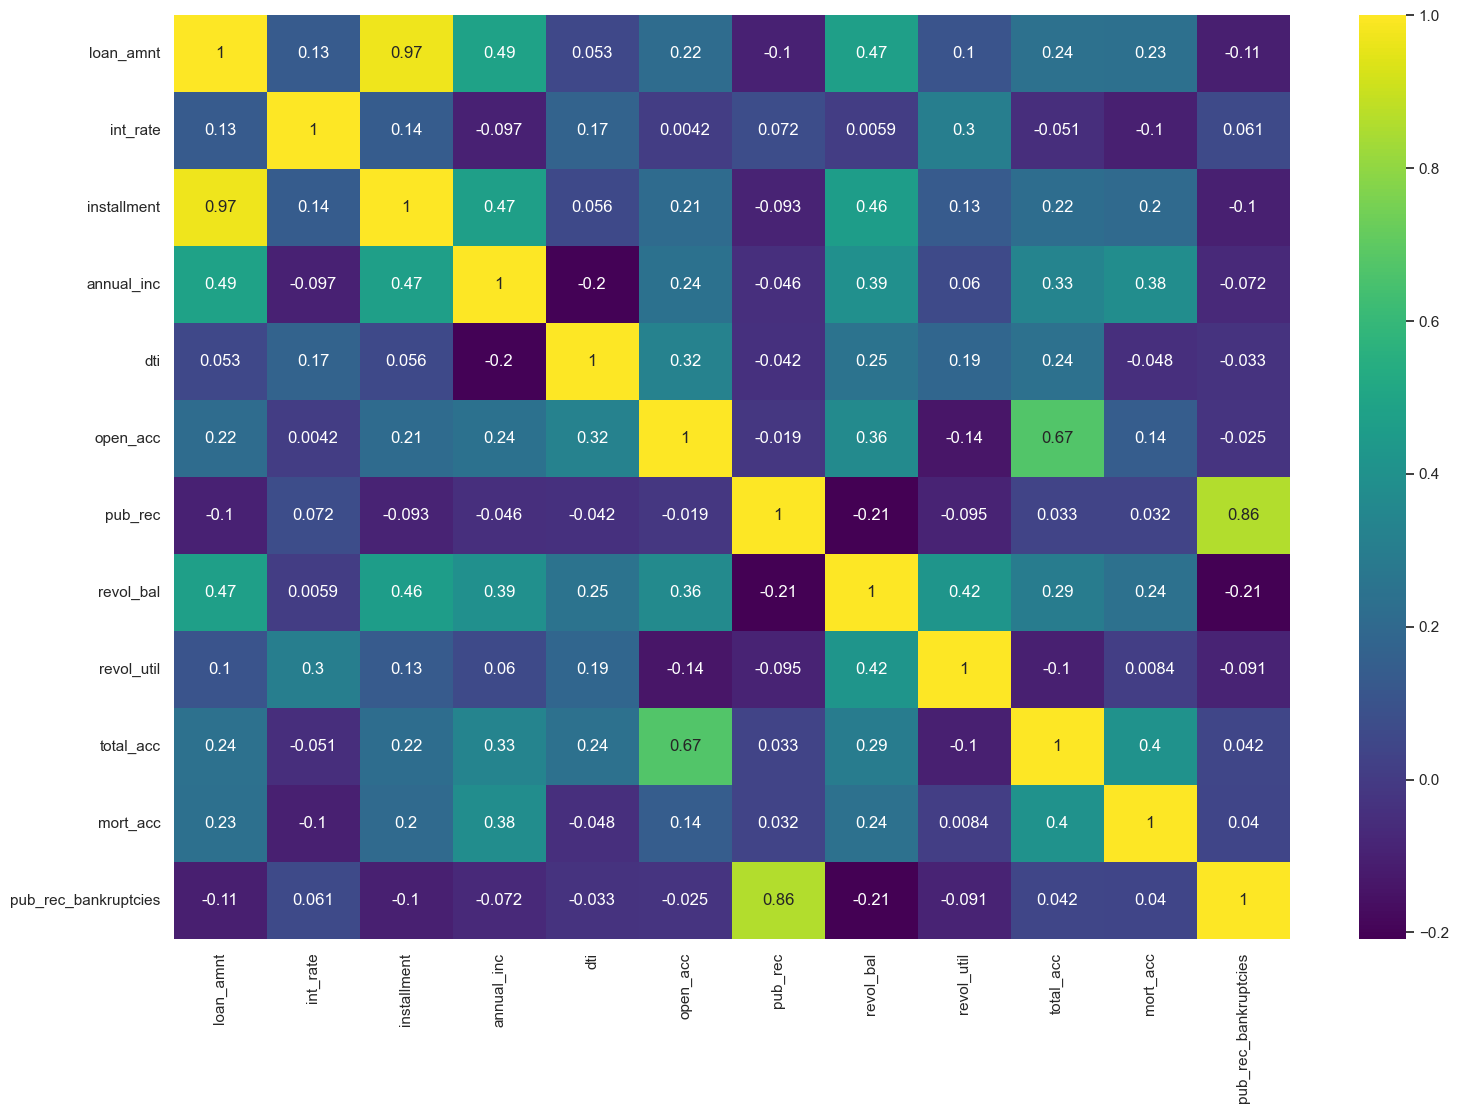

In [10]:
corr_check_dfs = df.select_dtypes(include=['float', "int"])

plt.figure(figsize=(18, 12))
sns.heatmap(corr_check_dfs.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

- Strong Positive Correlations:

    - Loan Amount and Installment (Correlation ~0.97): This indicates that as the loan amount increases, the installment amount also increases proportionally, which is expected given the structure of loans.
    - Total Accounts and Open Accounts (Correlation ~0.67): Borrowers with more open accounts tend to have a higher total number of accounts.
- Moderate Positive Correlations:

    - Loan Amount and Annual Income (Correlation ~0.49): Borrowers with higher annual incomes tend to request or qualify for higher loan amounts.
    - Revolving Balance and Annual Income (Correlation ~0.39): Individuals with higher incomes also tend to maintain higher revolving balances, possibly due to greater credit card usage or limits.
- Weak or Negligible Correlations:

    - Interest Rate and Loan Amount (Correlation ~0.13): Loan amounts and interest rates show minimal correlation, suggesting that interest rates might depend on other factors like credit score or loan term.
    - Revolving Utilization and Open Accounts (Correlation ~-0.14): The weak negative relationship suggests that utilization rates are not heavily dependent on the number of open accounts.

### **Data Preprocessing**

#### **Duplicate check**

In [11]:
duplicates = df[df.duplicated(subset = ["address","home_ownership","application_type"],keep = False)]
duplicates.count().sum()

56815

In [12]:
lt = df.drop_duplicates(subset =["address","home_ownership","application_type"],keep = "first")
lt.reset_index(drop = True, inplace = True)
lt.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
394888,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
394889,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
394890,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
394891,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
394892,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


##### **Filling Null Values**

In [13]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

- `emp_title`,`emp_length`,`title`,`revol_util`,`mort_acc`,`pub_rec_bankruptcies` contains null values

In [14]:
missing_columns = ['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']
missing_summary = df[missing_columns].isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Count']

# Strategy for imputing missing values
# - Categorical columns: Mode imputation
# - Numerical columns: Median imputation

# Imputation for categorical variables
categorical_cols = ['emp_title', 'emp_length', 'title']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imputation for numerical variables
numerical_cols = ['revol_util', 'mort_acc', 'pub_rec_bankruptcies']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\1698359502.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\1698359502.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [15]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

#### **Outlier Detection**

In [16]:
df.shape

(396030, 27)

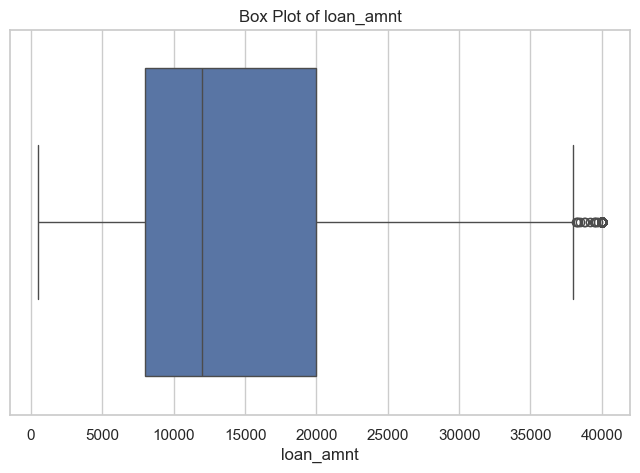

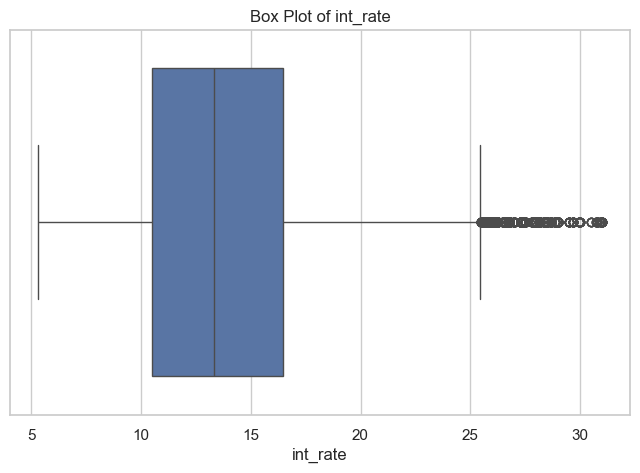

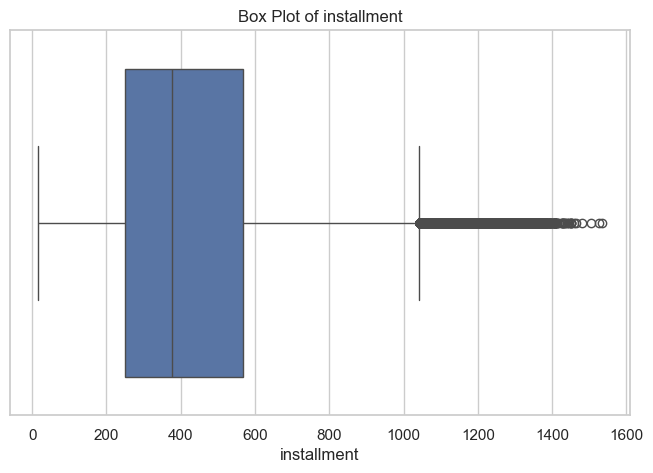

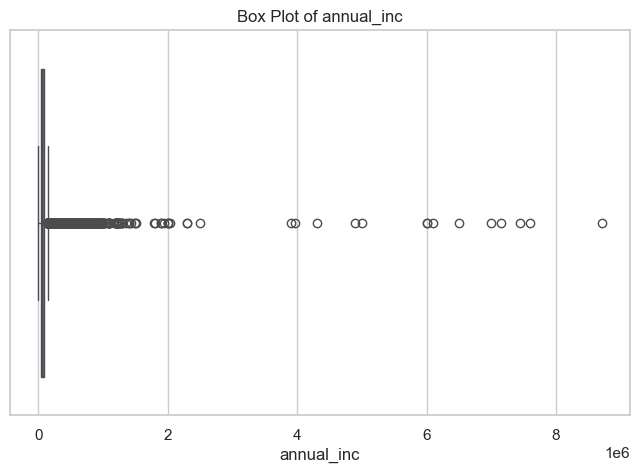

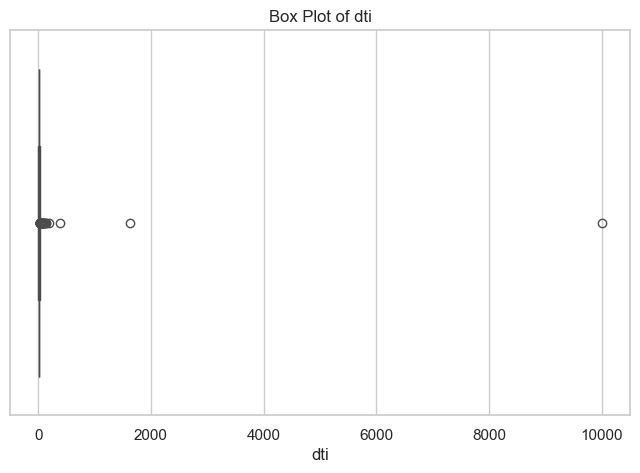

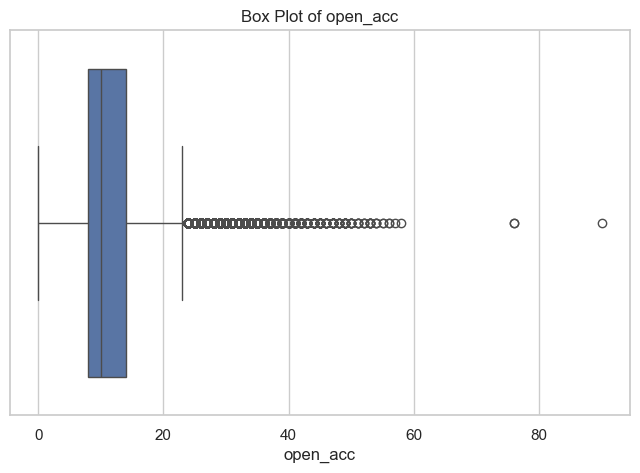

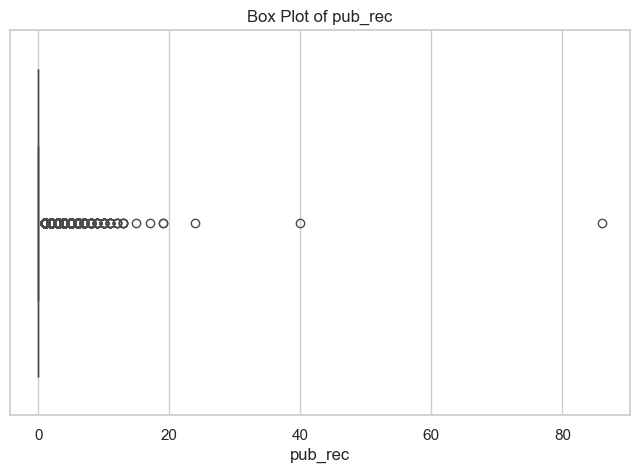

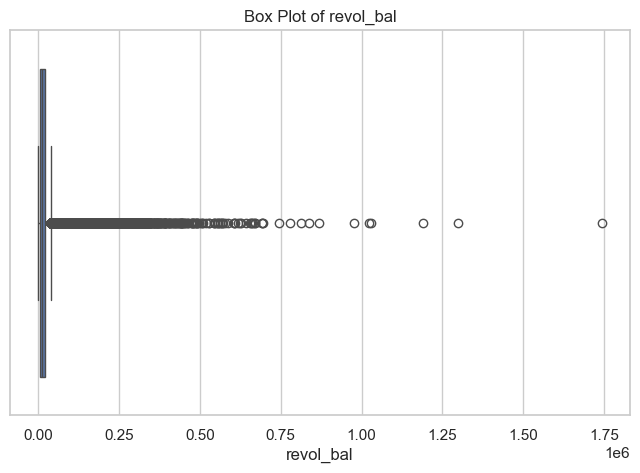

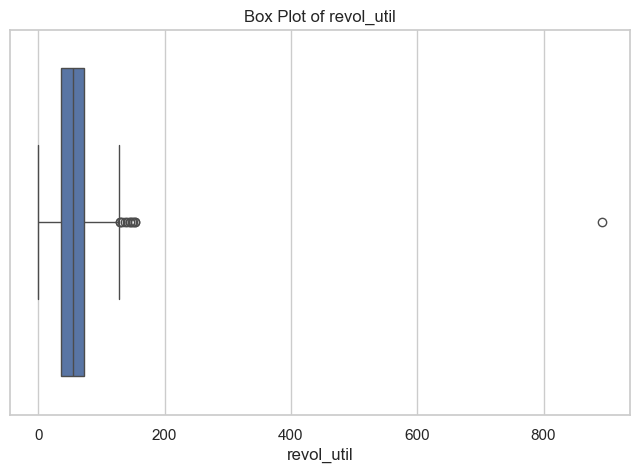

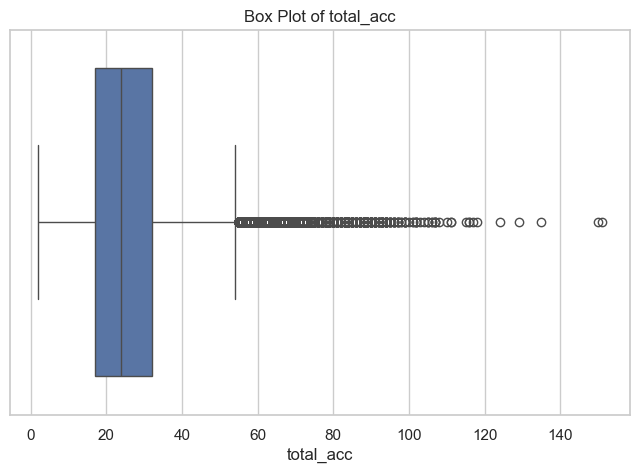

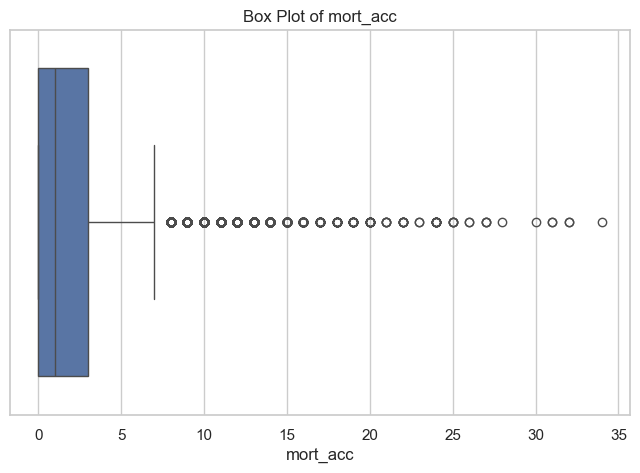

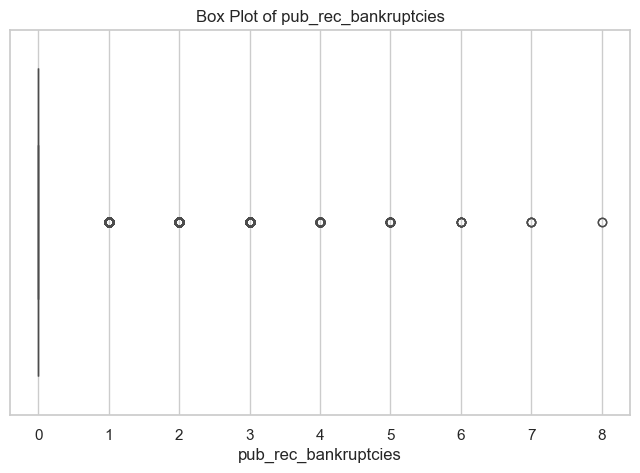

                            Q1        Q3       IQR  Lower Bound  Upper Bound  \
loan_amnt              8000.00  20000.00  12000.00   -10000.000    38000.000   
int_rate                 10.49     16.49      6.00        1.490       25.490   
installment             250.33    567.30    316.97     -225.125     1042.755   
annual_inc            45000.00  90000.00  45000.00   -22500.000   157500.000   
dti                      11.28     22.98     11.70       -6.270       40.530   
open_acc                  8.00     14.00      6.00       -1.000       23.000   
pub_rec                   0.00      0.00      0.00        0.000        0.000   
revol_bal              6025.00  19620.00  13595.00   -14367.500    40012.500   
revol_util               35.90     72.90     37.00      -19.600      128.400   
total_acc                17.00     32.00     15.00       -5.500       54.500   
mort_acc                  0.00      3.00      3.00       -4.500        7.500   
pub_rec_bankruptcies      0.00      0.00

In [17]:
# Define a function to calculate and visualize outliers using boxplots and IQR
def analyze_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Plot boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

    return {
        "Q1": Q1, "Q3": Q3, "IQR": IQR, 
        "Lower Bound": lower_bound, 
        "Upper Bound": upper_bound, 
        "Outlier Count": len(outliers)
    }

# Analyze and visualize for key continuous variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outlier_analysis = {}

for column in numerical_columns:
    outlier_analysis[column] = analyze_outliers(df, column)

# Convert the outlier analysis dictionary to a DataFrame
outlier_analysis_df = pd.DataFrame(outlier_analysis).T

# Display the DataFrame directly
print(outlier_analysis_df)


In [18]:
#capping and flooring the data
# Function to cap and floor outliers
def cap_and_floor(data, columns, lower_quantile=0.05, upper_quantile=0.95):
    capped_data = data.copy()
    for column in columns:
        lower_bound = capped_data[column].quantile(lower_quantile)
        upper_bound = capped_data[column].quantile(upper_quantile)
        
        # Apply capping and flooring
        capped_data[column] = capped_data[column].clip(lower=lower_bound, upper=upper_bound)
    
    return capped_data

# Apply capping and flooring to numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
capped_data = cap_and_floor(df, numerical_columns, lower_quantile=0.05, upper_quantile=0.95)

# Check summary statistics before and after capping
summary_before = df[numerical_columns].describe()
summary_after = capped_data[numerical_columns].describe()

summary_before,summary_after

(           loan_amnt       int_rate    installment    annual_inc  \
 count  396030.000000  396030.000000  396030.000000  3.960300e+05   
 mean    14113.888089      13.639400     431.849698  7.420318e+04   
 std      8357.441341       4.472157     250.727790  6.163762e+04   
 min       500.000000       5.320000      16.080000  0.000000e+00   
 25%      8000.000000      10.490000     250.330000  4.500000e+04   
 50%     12000.000000      13.330000     375.430000  6.400000e+04   
 75%     20000.000000      16.490000     567.300000  9.000000e+04   
 max     40000.000000      30.990000    1533.810000  8.706582e+06   
 
                  dti       open_acc        pub_rec     revol_bal  \
 count  396030.000000  396030.000000  396030.000000  3.960300e+05   
 mean       17.379514      11.311153       0.178191  1.584454e+04   
 std        18.019092       5.137649       0.530671  2.059184e+04   
 min         0.000000       0.000000       0.000000  0.000000e+00   
 25%        11.280000       8.00

- Before Capping:

    - Extreme values (outliers) were present in the dataset.
    - For example, annual_inc and dti had very high ranges, significantly impacting the mean and standard deviation.
- After Capping:

    - All values are now limited to fall between the 5th and 95th percentile range.
    - This reduces the impact of extreme values while retaining the overall data distribution and structure.

#### **Extracting features**

In [19]:
def pub_rec(number):
    if number == 0.0:
         return 0
    else:
         return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
         return 1
    else:
         return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
         return 0
    elif number >= 1.0:
         return 1
    else:
         return number

In [20]:
df['pub_rec']=df['pub_rec'].apply(pub_rec)
df['mort_acc']=df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

In [21]:
pub_rec_value_counts=df['pub_rec'].value_counts()
mort_acc_value_counts=df['mort_acc'].value_counts()
pub_rec_bankruptcies_value_counts=df['pub_rec_bankruptcies'].value_counts()

pub_rec_value_counts,mort_acc_value_counts,pub_rec_bankruptcies_value_counts

(pub_rec
 0    338272
 1     57758
 Name: count, dtype: int64,
 mort_acc
 1    256253
 0    139777
 Name: count, dtype: int64,
 pub_rec_bankruptcies
 0    350915
 1     45115
 Name: count, dtype: int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             396030 non-null  category
 7   emp_length            396030 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 396030 non-nul

In [23]:
#Extracting month and year from date related features
df.loc[:,"new_earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"],errors = "coerce")
df.loc[:,"new_issue_d"] = pd.to_datetime(df["issue_d"],errors = "coerce")

C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\850392728.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:,"new_earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"],errors = "coerce")
C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\850392728.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:,"new_issue_d"] = pd.to_datetime(df["issue_d"],errors = "coerce")


In [24]:
df['yearly_earliest_cr_line']=df['new_earliest_cr_line'].dt.year
df['monthly_earliest_cr_line']=df['new_earliest_cr_line'].dt.month
df["issued_year"]=df['new_issue_d'].dt.year
df['issued_month']=df['new_issue_d'].dt.month

In [25]:
# Extracting state and zipcode
df[['state','zipcode']] = df['address'].str.extract(r'([A-Z]{2}) (\d{5})')

In [26]:
col=['state','zipcode']
for i in col:
    print(df[i].value_counts())

state
AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
LA     7068
NV     7038
AK     7034
MA     7022
VA     7022
VT     7005
NY     7004
MS     7003
TX     7000
SC     6973
ME     6972
AR     6969
OH     6969
GA     6967
ID     6958
IN     6958
KS     6945
WV     6944
RI     6940
MO     6939
IL     6934
WY     6933
NE     6927
HI     6927
IA     6926
FL     6921
AZ     6918
CO     6914
OK     6911
CT     6904
MN     6904
NC     6901
OR     6898
CA     6898
AL     6898
MD     6896
WA     6895
UT     6887
SD     6887
MT     6883
DE     6874
TN     6869
ND     6858
MI     6854
DC     6842
NM     6842
PA     6825
NH     6818
KY     6800
Name: count, dtype: int64
zipcode
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64


In [27]:
df['emp_length_yrs'] = df['emp_length'].str.extract('(\d+)')
df.drop(['emp_length'], axis=1, inplace=True)
df['emp_length_yrs'].value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mohit\AppData\Local\Temp\ipykernel_21040\712289016.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length_yrs'] = df['emp_length'].str.extract('(\d+)')


emp_length_yrs
10    144342
1      57607
2      35827
3      31665
5      26495
4      23952
6      20841
7      20819
8      19168
9      15314
Name: count, dtype: int64

In [28]:
df.drop(["new_earliest_cr_line", "earliest_cr_line", "new_issue_d","issue_d","address"], axis = 1 ,inplace = True)

#### **Scaling**

In [29]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Handle Label Encoding for 'emp_length' if it exists in the dataset
if 'emp_length' in df.columns:
    ordinal_mapping = {
        '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
        '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10
    }
    df['emp_length'] = df['emp_length'].map(ordinal_mapping).fillna(0)

# One-Hot Encoding for nominal variables
# Cannot handle the data with one hot encoding due to curse of dimensionality
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Apply Target Encoding to other categorical variables
target_column = 'loan_status'  # Replace with the actual target variable
if target_column in df.columns:
    y = df[target_column]
    if target_column in categorical_columns:
        categorical_columns.remove(target_column)
    target_encoder = TargetEncoder()
    df[categorical_columns] = target_encoder.fit_transform(df[categorical_columns], y)

# Apply Standard Scaler to numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,application_type,mort_acc,pub_rec_bankruptcies,yearly_earliest_cr_line,monthly_earliest_cr_line,issued_year,issued_month,state,zipcode,emp_length_yrs
0,-0.492243,0.842262,-0.491799,-0.408291,0.874986,0.862643,0.770772,0.773088,0.694330,0.854503,...,0.803905,-1.353994,-0.358558,1990,6,2015,1,0.804427,0.806597,0.804529
1,-0.731551,0.842172,-0.368816,-0.662750,0.873745,0.844734,1.000000,0.830467,-0.149311,0.853469,...,0.803885,0.738556,-0.358558,2004,7,2015,1,0.805760,1.000000,0.808659
2,0.177819,0.842460,-0.704225,0.299609,0.874749,0.876922,0.728267,0.773901,-0.505312,0.786314,...,0.803943,-1.353994,-0.358558,2007,8,2015,1,0.793827,1.000000,0.797119
3,-0.827274,0.842559,-1.598649,-0.842348,0.937247,0.953028,0.803869,0.773641,-0.327774,0.854028,...,0.803925,-1.353994,-0.358558,2006,9,2014,11,0.804655,1.000000,0.810070
4,1.227783,0.681712,0.811824,0.707861,0.788538,0.756532,0.803869,0.830558,-0.311550,0.777547,...,0.803906,0.738556,-0.358558,1999,3,2013,4,0.806215,0.000000,0.799902


#### **VIF Check for Multicollinearity**

In [31]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'yearly_earliest_cr_line', 'monthly_earliest_cr_line', 'issued_year',
       'issued_month', 'state', 'zipcode', 'emp_length_yrs'],
      dtype='object')

In [32]:
import statsmodels.api as sm

In [33]:
X = df[df.columns.drop('loan_status')]
y = df["loan_status"].map({"Fully Paid" : 0 , "Charged Off" : 1})

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled

array([[ 1.30259488,  0.5605157 , -1.17161078, ..., -0.27183002,
        -0.01634765,  0.34796912],
       [-0.25273589,  0.55632753, -1.28337356, ...,  0.77413993,
         0.75349671,  0.60919363],
       [ 1.08724139, -1.78465187,  0.08013229, ..., -1.02797147,
         0.75349671,  0.11702398],
       ...,
       [ 0.17797109,  0.56196273, -0.31774319, ..., -0.98862755,
         0.75349671,  0.61650079],
       [ 1.24576549,  0.5605157 ,  0.78423777, ..., -0.45330128,
        -0.01634765,  0.32067285],
       [ 0.1061866 , -1.8065454 ,  0.44224368, ...,  0.43543168,
         0.00349155, -1.72533732]])

In [36]:
X_sm = sm.add_constant(X_tr_scaled)

In [37]:
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     9309.
Date:                Sun, 22 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:59:12   Log-Likelihood:                -59198.
No. Observations:              316824   AIC:                         1.185e+05
Df Residuals:                  316794   BIC:                         1.188e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1960      0.001    378.202      0.0

In [38]:
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif = pd.DataFrame()
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
print(vif)
cols2 = vif["Features"][1:].values

                    Features        VIF
0                  loan_amnt  58.923665
1                       term   6.675626
2                   int_rate  19.360972
3                installment  51.273124
4                      grade  22.420218
5                  sub_grade  39.447330
6                  emp_title   1.017654
7             home_ownership   1.650927
8                 annual_inc   1.246692
9        verification_status   1.163943
10                   purpose   1.110013
11                     title   1.160921
12                       dti   1.045668
13                  open_acc   2.030366
14                   pub_rec   4.105993
15                 revol_bal   1.339147
16                revol_util   1.255907
17                 total_acc   2.171722
18       initial_list_status   1.277076
19          application_type   1.003173
20                  mort_acc   1.811142
21      pub_rec_bankruptcies   4.060200
22   yearly_earliest_cr_line   1.205261
23  monthly_earliest_cr_line   1.001233


In [39]:
vif_thr = 5
feats_removed=['loan_amnt']
i=1

In [40]:
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    pub_rec
VIF             4.1
Name: 1, dtype: object
Current adj.R2 0.45918969011994204
Features removed: 3
List of features removed: ['loan_amnt', 'sub_grade', 'int_rate']


In [41]:
vif

,Features,VIF
1,pub_rec,4.10
2,pub_rec_bankruptcies,4.05
3,total_acc,2.17
4,open_acc,2.03
5,mort_acc,1.77
6,home_ownership,1.64
0,grade,1.59
7,issued_year,1.53
8,term,1.39
9,installment,1.36


In [42]:
X=X_t
X

,grade,pub_rec,pub_rec_bankruptcies,total_acc,open_acc,mort_acc,home_ownership,issued_year,term,installment,...,verification_status,purpose,issued_month,dti,zipcode,emp_title,application_type,monthly_earliest_cr_line,state,emp_length_yrs
0,1.293946,-0.412529,-0.357509,-0.287712,-0.449677,0.739313,-1.099442,0.248591,0.560516,1.420617,...,-0.517320,-0.496796,1.004930,-0.322022,-0.016348,0.003807,0.015172,1.528433,-0.271830,0.347969
1,1.305739,-0.412529,-0.357509,0.384540,0.523156,0.739313,0.978309,0.923226,0.556328,-0.224789,...,1.457233,-0.460707,-0.745285,-0.332665,0.753497,0.003807,0.003512,0.945928,0.774140,0.609194
2,-0.151216,2.424070,-0.357509,1.308888,0.523156,0.739313,0.978309,0.923226,-1.784652,0.430517,...,-0.562296,1.212789,0.129823,-0.108149,0.753497,1.484309,0.003512,-1.675344,-1.027971,0.117024
3,-0.151216,-0.412529,-0.357509,1.224856,0.328590,0.739313,0.978309,-0.426044,-1.784652,-0.117167,...,-0.562296,-0.460707,-1.328690,-0.159337,-0.017922,0.617595,0.003512,1.237180,-0.752729,1.224522
4,1.304391,2.424070,-0.357509,-1.128028,-0.644244,-1.352606,-1.129302,0.923226,0.557639,0.462948,...,-0.556074,-0.500462,-1.620392,-0.258165,0.001008,0.003807,0.007504,-0.510334,0.469238,1.163799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316819,-0.156460,-0.412529,-0.357509,-0.455775,-0.838811,0.739313,0.962417,0.923226,0.560516,1.003930,...,-0.517320,-0.496796,0.421525,-0.570865,0.001811,-2.021228,0.015172,-1.384092,-0.738112,0.347969
316820,-2.266407,-0.412529,-0.357509,-0.959965,-0.644244,-1.352606,-1.108978,-1.100679,-1.807799,1.647749,...,-0.538622,-0.460012,1.296632,-0.621546,-3.090311,0.003784,0.011520,-0.801587,-0.402085,-1.854303
316821,0.687222,-0.412529,-0.357509,0.048414,-0.255111,0.739313,-1.108978,-3.124584,0.561963,0.350778,...,1.473661,-0.460012,-0.161880,-0.675267,0.753497,1.484309,0.011520,0.945928,-0.988628,0.616501
316822,-0.908317,2.424070,2.797133,-0.455775,0.328590,0.739313,-1.099442,0.923226,0.560516,1.772364,...,-0.802146,-0.496796,-1.328690,0.743288,-0.016348,-0.700844,0.015172,-0.801587,-0.453301,0.320673


### **Model Building**

C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


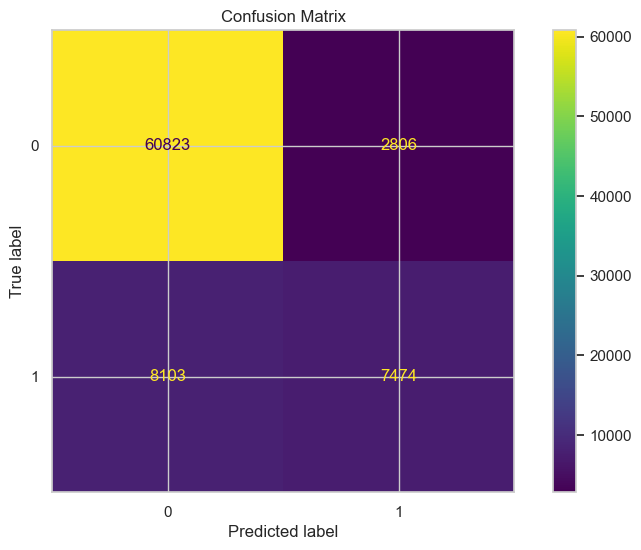

In [43]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     63629
           1       0.73      0.48      0.58     15577

    accuracy                           0.86     79206
   macro avg       0.80      0.72      0.75     79206
weighted avg       0.85      0.86      0.85     79206



- The model performs well on the majority class (Non-loan defaults), but struggles with the minority class (Loan defaults).
- The low recall for Class 1 (Defaults) indicates a high false-negative rate, which can be critical in a loan default prediction scenario.

- Handle Class Imbalance:

    - Use techniques like oversampling (e.g., SMOTE) or undersampling to balance the dataset.

ROC-AUC Score: 0.8378206809813515


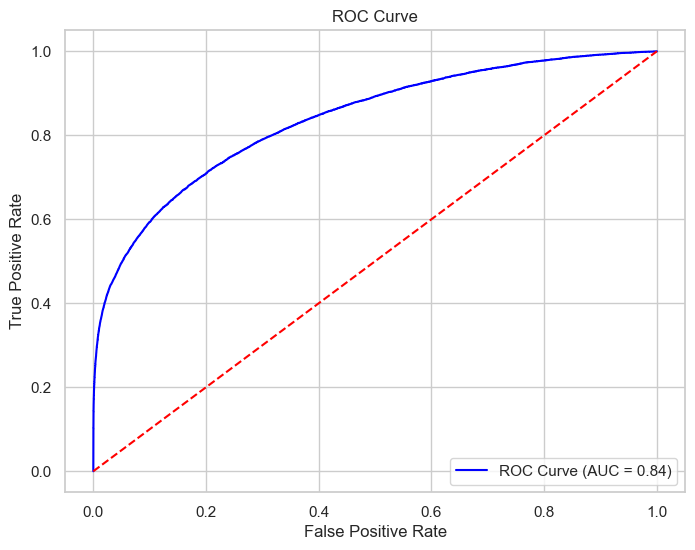

Precision-Recall AUC: 0.676478968138555


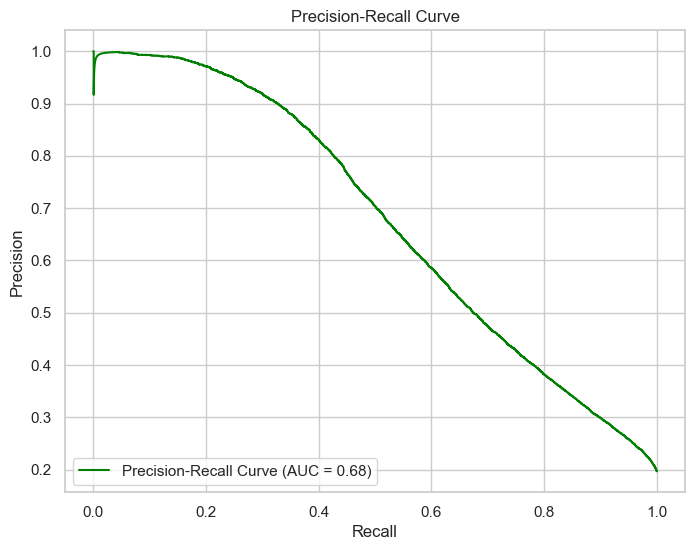

In [45]:
# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


#### **Performing SMOTE**

In [46]:
#pip install imblearn

C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


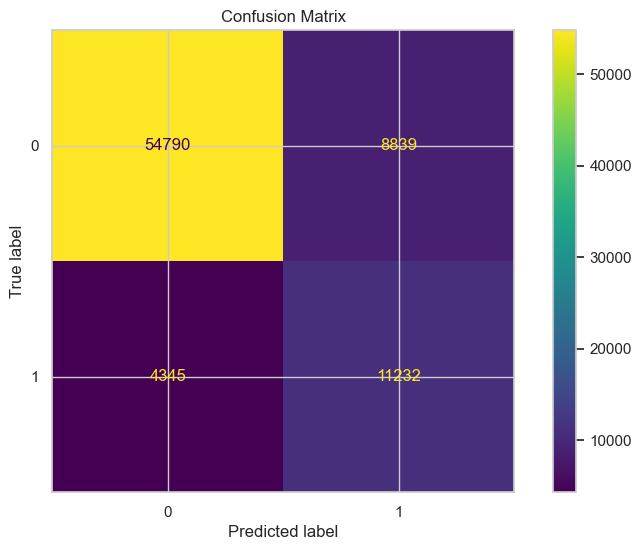

Accuracy: 0.8335479635381158, Precision Score: 0.5596133725275273, Recall Score: 0.7210631058612056


In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train logistic regression
finalmodel = LogisticRegression(max_iter=1000)
finalmodel.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = finalmodel.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy}, Precision Score: {precision}, Recall Score: {recall}')

In [111]:
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     63629
           1       0.55      0.73      0.63     15577

    accuracy                           0.83     79206
   macro avg       0.74      0.79      0.76     79206
weighted avg       0.85      0.83      0.84     79206



ROC-AUC Score: 0.9016098784419515


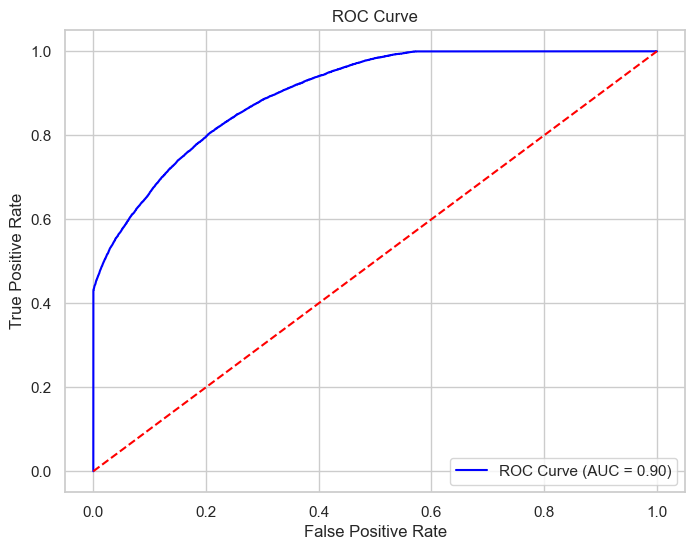

Precision-Recall AUC: 0.7708489552075026


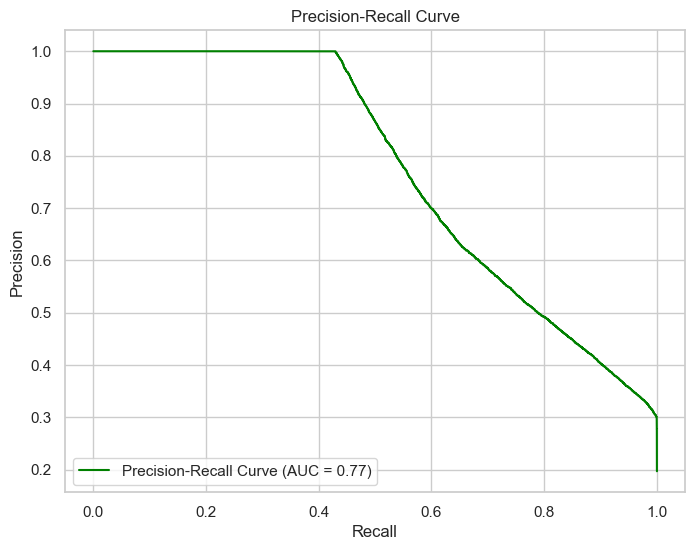

In [112]:
# Get the predicted probabilities for the positive class
y_prob = finalmodel.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


#### **Hyperparameter Tuning**

In [93]:
# Standardize data
scaler = StandardScaler()
X_train_smote1 = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Updated parameter grid
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],  # Use robust solver
    'max_iter': [500, 1000]  # Increase iterations
}

# Randomized search
randomized_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_distributions,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_train_smote1, y_train_smote)

# Best parameters and performance
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best ROC-AUC Score: {randomized_search.best_score_}")

best_model = randomized_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)

# Extract precision, recall, and F1 scores for each class and overall
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10}
Best ROC-AUC Score: 0.9308304613636907
Precision: 0.86
Recall: 0.84
F1-Score: 0.84
ROC-AUC: 0.90


C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- Precision: 0.86
- Recall: 0.84
- F1-Score: 0.84
- ROC-AUC: 0.90

#### **Model Interpretability**

In [114]:
model.coef_,model.intercept_

(array([[ 2.34061930e-01, -1.46565019e-01,  7.76411579e-01,
         -2.97442591e-01, -1.33021225e-01, -1.41002178e-01,
         -2.08063907e-01, -1.81810501e-02, -5.66986677e-01,
         -3.11178502e-02, -1.57129433e-02, -7.78757802e-02,
          6.76296669e-01,  3.43213749e-01, -5.14837913e-02,
         -2.02894175e-01, -1.60851677e-01, -9.98349201e-02,
         -2.19031023e-03, -7.03078953e-04,  1.16012157e-02,
         -2.37294140e-01, -1.13990923e-02,  1.36551980e-01,
          1.18935805e-02, -2.99848294e-02, -2.91000368e-04,
         -4.05566453e+00, -1.20472309e-03]]),
 array([-0.00067314]))

In [132]:

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': finalmodel.coef_[0]
})

# Sort coefficients by importance
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print(coefficients)

                     Feature  Coefficient
0                  loan_amnt     1.201343
2                   int_rate     0.404569
12                       dti     0.349030
13                  open_acc     0.218448
16                revol_util     0.197465
21      pub_rec_bankruptcies     0.021247
24               issued_year     0.018217
26                     state     0.008530
19          application_type     0.008173
22   yearly_earliest_cr_line    -0.005022
28            emp_length_yrs    -0.006233
18       initial_list_status    -0.007868
23  monthly_earliest_cr_line    -0.015879
14                   pub_rec    -0.016904
25              issued_month    -0.022166
15                 revol_bal    -0.089341
20                  mort_acc    -0.136814
10                   purpose    -0.158765
17                 total_acc    -0.165415
9        verification_status    -0.220058
7             home_ownership    -0.228530
8                 annual_inc    -0.430825
4                      grade    -0

- **Tradeoff Questions**:
    - How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. 
        - By increasing the prediction threshold (e.g., from 0.5 to 0.7), only borrowers with a very high likelihood of default will be flagged as defaulters.
        - Set stricter approval criteria for high-risk borrowers based on model predictions.     Offer secured loans or reduced credit limits to mitigate risk.
        - Risk: High recall may result in rejecting creditworthy borrowers, leading to lost business.
        - Benefit: Safeguards against NPAs, reducing long-term financial risks.
    - Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
        - Combine precision and recall to find a balanced model performance.
        - Use the ROC-AUC and Precision-Recall curves to identify optimal thresholds that balance both metrics.

- **Additional Questions:**
    - What percentage of customers have fully paid their Loan Amount?

In [115]:
fully_paid_percentage = (df['loan_status'].value_counts(normalize=True) * 100)
print(fully_paid_percentage)

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64


 - Comment about the correlation between Loan Amount and Installment features.

In [116]:
df[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


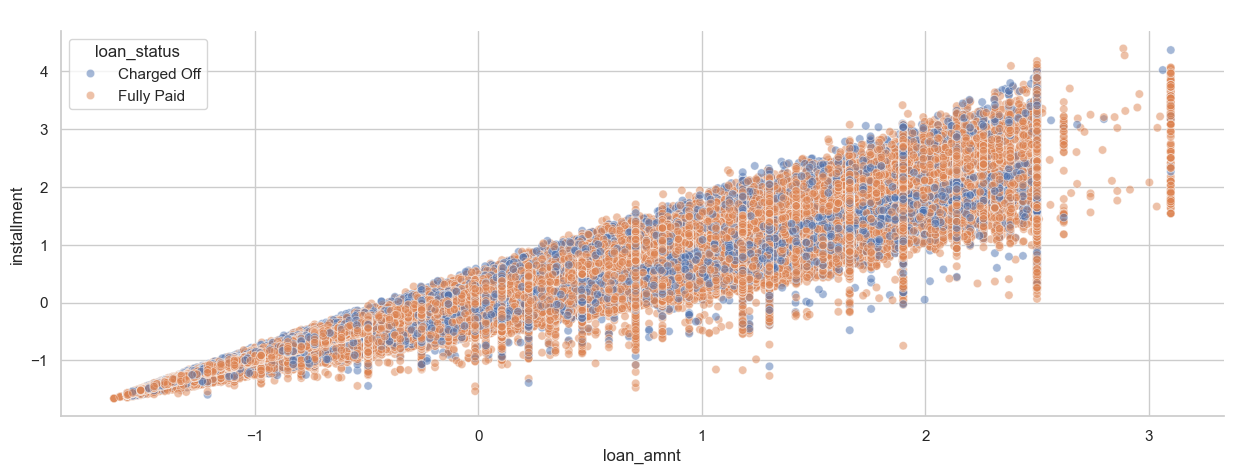

In [117]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'loan_amnt', y = 'installment', alpha = 0.5, hue = 'loan_status')
plt.title('Loan Amt Vs Installments',fontsize=12,fontfamily='serif',fontweight='bold',color='w')
sns.despine()
plt.show()

The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient between 'loan_amnt' and 'installment' is quite high, approximately 0.95, indicating a strong positive linear relationship between these two variables.

- Loan Terms: Understanding the relationship between loan amount and installment payments is crucial for setting appropriate loan terms. Lenders can adjust loan terms such as interest rates and repayment periods based on the borrower's ability to handle installment payments associated with different loan amounts.

- Potential Multicollinearity: When building predictive models, it's essential to be cautious of multicollinearity between highly correlated predictor variables. Multicollinearity can lead to unstable estimates and difficulties in interpreting the model coefficients. Therefore, it might be necessary to address multicollinearity through techniques such as variable selection or regularization.

- The majority of people have home ownership as `Mortgage`

In [118]:
(df1['home_ownership'].value_counts(normalize=True)*100).to_frame()

,proportion
home_ownership,
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


- People with grades ‘A’ are more likely to fully pay their loan. 

In [ ]:
pd.crosstab(df1['grade'],df['loan_status'], normalize = 'index')

- `True`. **Grade 'A' borrowers demonstrate a significantly high likelihood of fully repaying their loans**, with True. Grade 'A' borrowers demonstrate a significantly high likelihood of fully repaying their loans, with approximately **93.71%** of loans being fully paid. 

This suggests that borrowers with the **highest credit rating** are more inclined to fulfill their loan obligations successfully. of loans being fully paid. This suggests that borrowers with the highest credit rating are more inclined to fulfill their loan obligations successfully.

- Name the top 2 afforded job titles.

In [119]:
df1[df1['emp_title'] != 'No Employee Title']['emp_title'].value_counts().to_frame().head()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


In [ ]:
df.groupby('emp_title')['loan_status'].count().sort_values(ascending=False).to_frame()[1:6]

- The Most afforded job titles are Teachers & Managers.

Thinking from a bank's perspective, which metric should our primary focus be on..
1. ROC AUC
2. Precision
3. Recall
4. F1 Score

    - From a bank's perspective, minimizing risks and maximizing profitability are paramount. ROC AUC (Receiver Operating Characteristic Area Under Curve) is indeed a crucial metric because it encompasses both True Positive Rate (TPR) and False Positive Rate (FPR)

    - Bank's primary focus should be on ROC AUC , because bank needs to reduce FPR (False Positive Rate) and needs to increase the TPR (True Positive Rate).
    Maximizing TPR ensures that the bank correctly identifies customers who fully pay their loans (reducing False Negatives), while minimizing FPR ensures that the bank doesn't wrongly classify customers as fully paid when they're actually charged off (reducing False Positives).

    - By optimizing ROC AUC, the bank can strike a balance between correctly identifying creditworthy customers and minimizing the risk of defaulters, thereby enhancing the overall performance and reliability of its credit scoring model.

- How does the gap in precision and recall affect the bank?

    - To comprehend the errors made by a model, it's crucial to evaluate both false positives and false negatives, which are gauged through metrics like recall and precision. When recall is low, it poses a significant risk for the bank.
    - So, the gap between precision and recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.
    - Good precision means less False Positives. i.e. Less NPA loan accounts.
    - Good recall means less False Negatives. i.e. not loosing on good customer.

- Which were the features that heavily affected the outcome?
    - `loan_amnt`, `int_rate`, `dti`, `open_acc`, `revol_util` are the features that affects the outcome heavily      
    

- Will the results be affected by geographical location? (Yes/No)
    - Yes, we can see that zip_code (Address) is a very important feature so geographical location has impact on our result.

### **Business Recommendations**

- Focus on maximizing the F1 score and area under the Precision-Recall Curve to effectively manage the precision-recall trade-off. This ensures identifying most defaulters while reducing false positives, enhancing risk management.
- Consider using more complex classifiers like Random Forests or XGBoost and perform hyperparameter tuning to enhance model performance and capture intricate relationships in the data.
- Employed stratified k-fold cross-validation to ensure representative distribution of minority class in each fold, providing reliable estimates of model performance.
- Optimize Loan Approval Strategy:

    - Scrutinize loans with lower grades more rigorously and consider adjusting interest rates to compensate for higher risk.
    - Implement targeted strategies for high-risk zip codes, such as additional verification steps or higher interest rates.
    - Evaluate small business loans with additional financial health checks and collateral requirements to mitigate default risk.
    - By implementing these recommendations, LoanTap can enhance their loan approval process, minimize the risk of NPAs, and ensure sustainable growth and financial stability.

#### **Conclusion**
- The Logistic Regression model for LoanTap demonstrates significant predictive power with a precision of 86% and an accuracy of 84%. The adjustments made to the threshold successfully enhanced precision, reducing the likelihood of false positives. These results suggest that the model is well-suited for LoanTap's operational needs in assessing loan risk and informing decision-making.

